# Volume Predictions
## Predicting Volume Based on Feature Variables  

### Objective:  
Any  fast-moving consumer goods (FMCG) industry faces challenges in accurately predicting daily sales volume due to the influence of various external factors like weather conditions and holidays. Inaccurate volume predictions can lead to overstocking or understocking, resulting in financial losses and reduced customer satisfaction. Therefore, there is a need for a robust and accurate forecasting model that can effectively predict daily sales volume by considering these external factors, enabling businesses to optimize inventory management and improve overall operational efficiency.

# Importing Dataframe

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data volume.csv', index_col='Date',parse_dates=True)
df.tail(20)

Volume  Holiday  Max_Temp  Min._Temp.  Avg. Temp.  \
Date                                                                 
2025-01-23  43414.49304        0      23.0        13.0        17.2   
2025-01-24  43736.15871        0      22.0        10.0        15.6   
2025-01-25  43241.53802        0      22.0         9.0        14.5   
2025-01-26  43816.52153        1      22.0         8.0        14.5   
2025-01-27  43798.64519        0      21.0         8.0        14.1   
2025-01-28  43578.76768        0      22.5         7.4        14.0   
2025-01-29          NaN        0      24.0         8.3        15.1   
2025-01-30          NaN        0      25.0        10.6        16.5   
2025-01-31          NaN        0      25.1        11.1        17.1   
2025-02-01          NaN        0      24.1        11.8        17.3   
2025-02-02          NaN        0      22.8        12.6        16.8   
2025-02-03          NaN        0      23.3        10.9        16.2   
2025-02-04          NaN        0      24.4        12.8        18.3   
2025-02-05          NaN        0      26.0        11.0        16.4   
2025-02-06          NaN        0      22.3        11.2        16.0   
2025-02-07          NaN        0      22.3        11.0        16.0   
2025-02-08          NaN        0      24.4        10.9        16.7   
2025-02-09          NaN        0      25.1        10.0        16.8   
2025-02-10          NaN        0      26.0        10.5        17.8   
2025-02-11          NaN        0      27.5        12.1        19.0   

            Percipitation  
Date                       
2025-01-23            7.9  
2025-01-24            0.0  
2025-01-25            0.0  
2025-01-26            0.0  
2025-01-27            0.0  
2025-01-28            0.0  
2025-01-29            0.0  
2025-01-30            0.0  
2025-01-31            0.0  
2025-02-01            0.0  
2025-02-02            0.0  
2025-02-03            0.0  
2025-02-04            0.0  
2025-02-05            0.0  
2025-02-06            0.0  
2025-02-07            0.0  
2025-02-08            0.0  
2025-02-09            0.0  
2025-02-10            0.0  
2025-02-11            0.0

# EDA on Features


In [5]:
df = df.dropna()

In [6]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Quater'] = df.index.quarter
df['Day of Week'] = df.index.dayofweek
# Creating different columns for year, month and days to better analysis of the data

In [7]:
df.describe()

Volume      Holiday     Max_Temp   Min._Temp.   Avg. Temp.  \
count   1399.000000  1399.000000  1399.000000  1399.000000  1399.000000   
mean   43943.220222     0.059328    31.684417    19.869764    25.159114   
std     1140.443271     0.236322     7.024684     7.453862     7.334373   
min    40861.014890     0.000000    13.000000     3.400000     9.300000   
25%    43088.144950     0.000000    26.400000    12.750000    18.300000   
50%    44101.621530     0.000000    33.600000    21.600000    27.600000   
75%    44805.010650     0.000000    36.400000    26.200000    31.050000   
max    46615.274500     1.000000    46.800000    33.600000    39.100000   

       Percipitation         Year        Month          Day       Quater  \
count    1399.000000  1399.000000  1399.000000  1399.000000  1399.000000   
mean        2.934310  2022.647605     6.703360    15.717655     2.575411   
std        13.140549     1.124976     3.412706     8.796600     1.094855   
min         0.000000  2021.000000     1.000000     1.000000     1.000000   
25%         0.000000  2022.000000     4.000000     8.000000     2.000000   
50%         0.000000  2023.000000     7.000000    16.000000     3.000000   
75%         0.000000  2024.000000    10.000000    23.000000     4.000000   
max       228.100000  2025.000000    12.000000    31.000000     4.000000   

       Day of Week  
count  1399.000000  
mean      3.000715  
std       2.001251  
min       0.000000  
25%       1.000000  
50%       3.000000  
75%       5.000000  
max       6.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1399 entries, 2021-04-01 to 2025-01-28
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Volume         1399 non-null   float64
 1   Holiday        1399 non-null   int64  
 2   Max_Temp       1399 non-null   float64
 3   Min._Temp.     1399 non-null   float64
 4   Avg. Temp.     1399 non-null   float64
 5   Percipitation  1399 non-null   float64
 6   Year           1399 non-null   int32  
 7   Month          1399 non-null   int32  
 8   Day            1399 non-null   int32  
 9   Quater         1399 non-null   int32  
 10  Day of Week    1399 non-null   int32  
dtypes: float64(5), int32(5), int64(1)
memory usage: 103.8 KB


Text(0, 0.5, 'Volume')

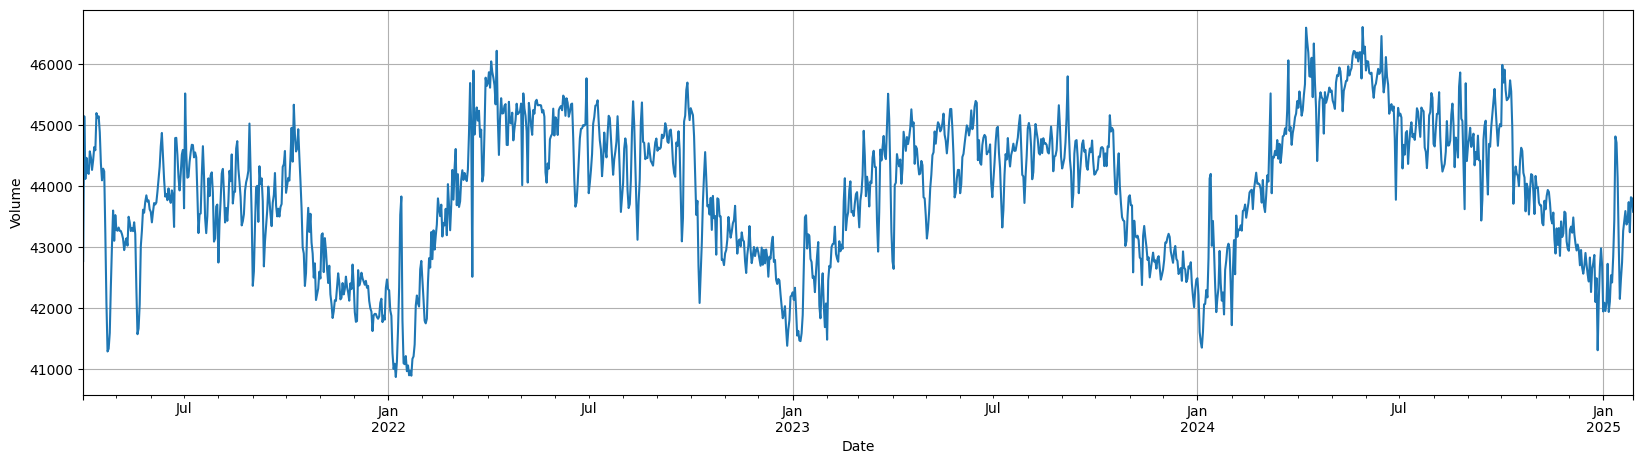

In [9]:
df['Volume'].plot(figsize=(20,5))
plt.grid(True)
plt.ylabel('Volume')

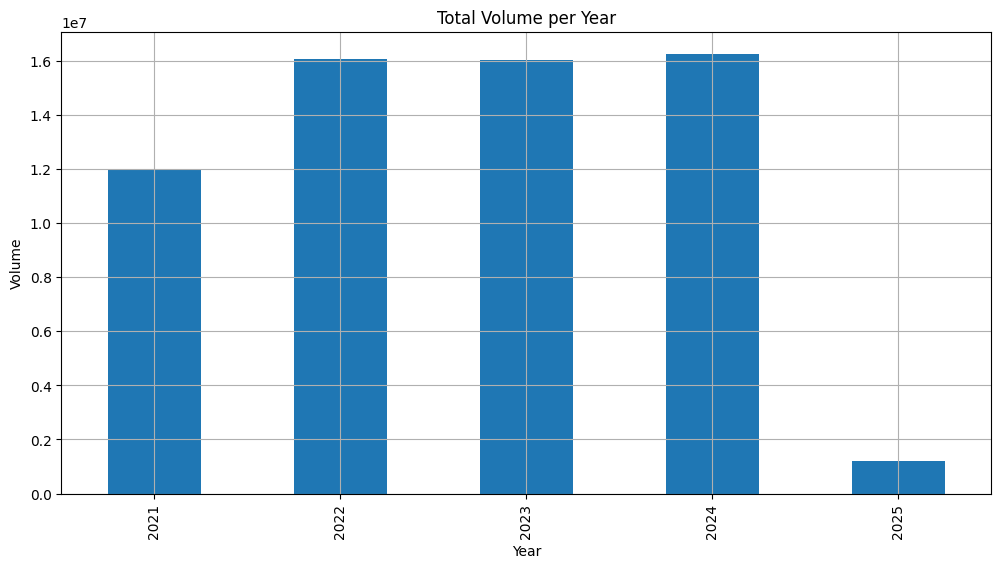

In [10]:
# Annual Sales Volume
yearly_volume = df.groupby('Year')['Volume'].sum().plot(kind='bar', figsize=(12, 6))
plt.title('Total Volume per Year'); plt.xlabel('Year'); plt.ylabel('Volume')
plt.grid(True)
plt.show()

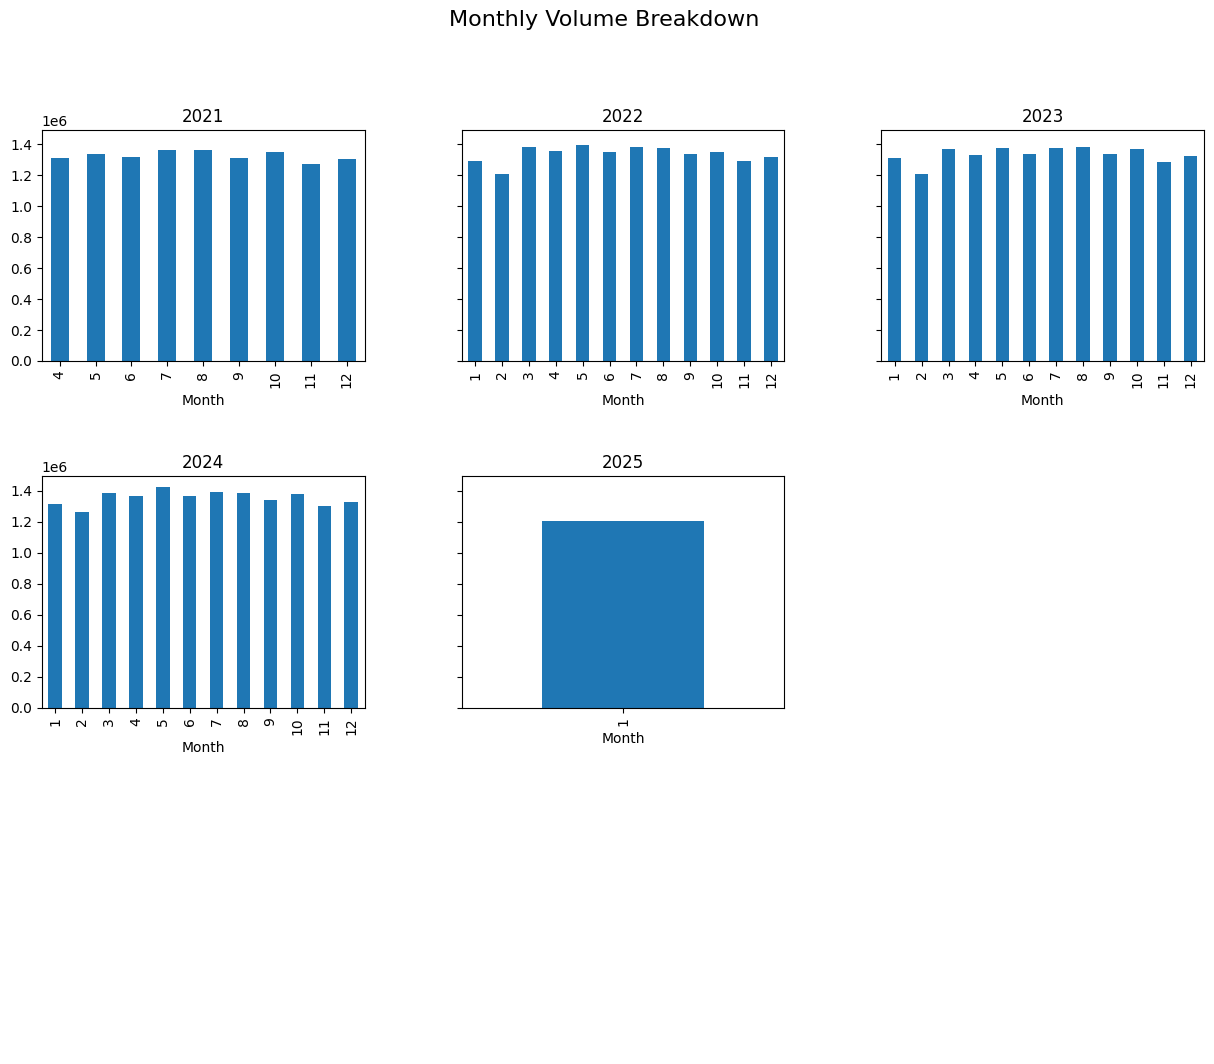

In [11]:
# Volume through the months in years
fig, axes = plt.subplots(3, 3, figsize=(15, 12), sharey=True)
fig.suptitle('Monthly Volume Breakdown', fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, year in enumerate(df['Year'].unique()):
    if i < 9:
        df[df['Year'] == year].groupby('Month')['Volume'].sum().plot(kind='bar', ax=axes[i // 3, i % 3])
        axes[i // 3, i % 3].set_title(year)
        axes[i // 3, i % 3].set_xlabel('Month')
    else:
        break

for i in range(len(df['Year'].unique()), 9):
    axes[i // 3, i % 3].axis('off')

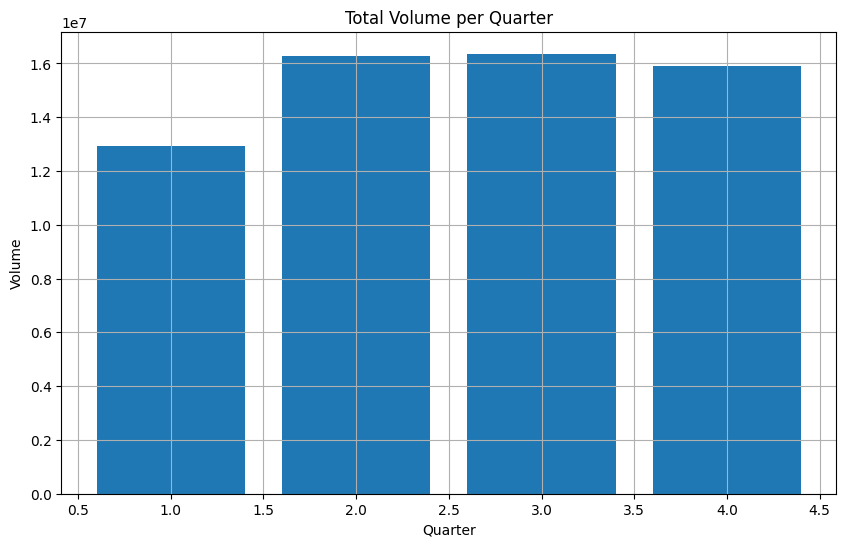

In [12]:
# Quaterly Sales Volume
quarterly_volume = df.groupby('Quater')['Volume'].sum()

plt.figure(figsize=(10, 6))
plt.bar(quarterly_volume.index, quarterly_volume.values)
plt.title('Total Volume per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

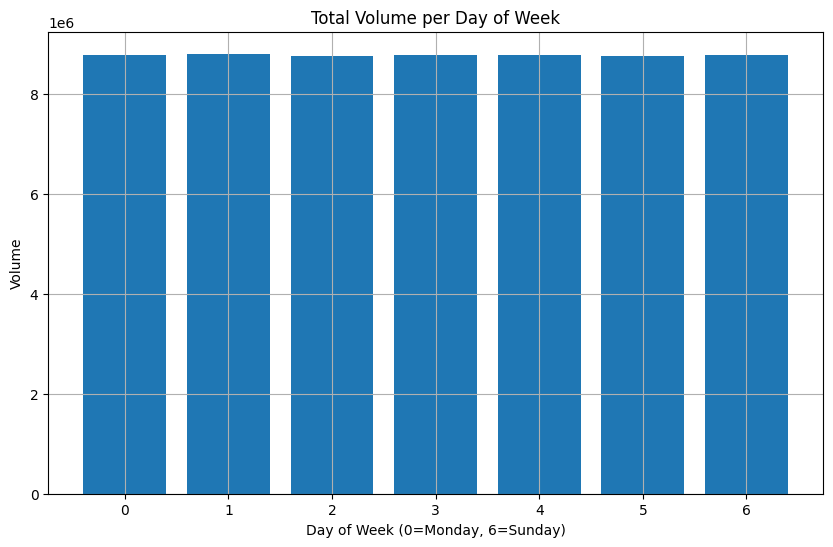

In [13]:
# Daily Sales Volume
daily_volume = df.groupby('Day of Week')['Volume'].sum()

plt.figure(figsize=(10, 6))
plt.bar(daily_volume.index, daily_volume.values)
plt.title('Total Volume per Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

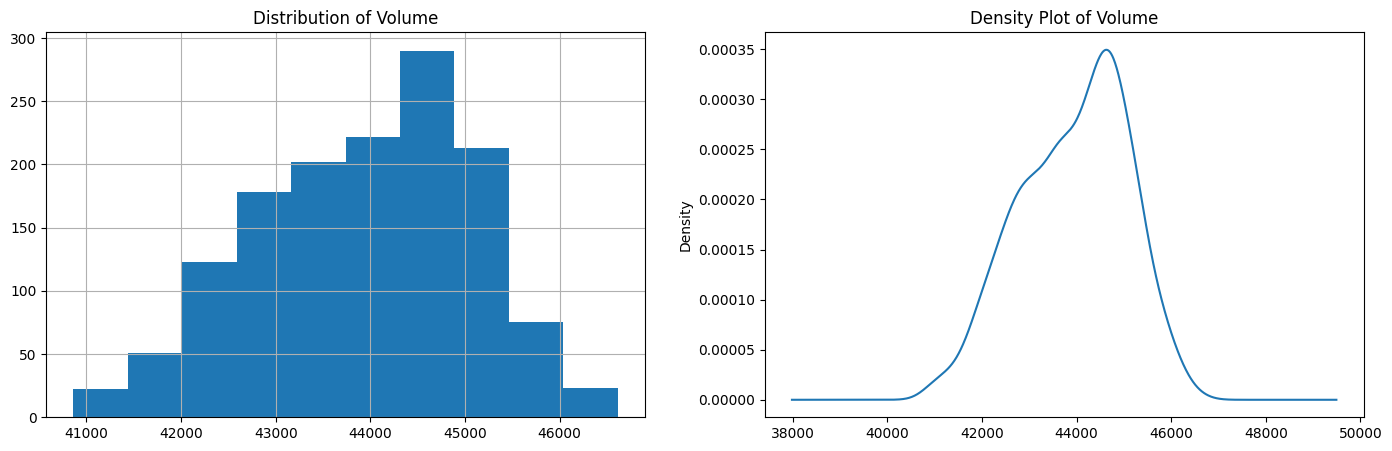

In [14]:
# Distribution and density of Volume
fig, axes = plt.subplots(1, 2, figsize=(17,5))
plt.grid(True)

df['Volume'].hist(ax=axes[0])
axes[0].set_title('Distribution of Volume')
df['Volume'].plot(kind='kde', ax=axes[1])
axes[1].set_title('Density Plot of Volume')

plt.show()

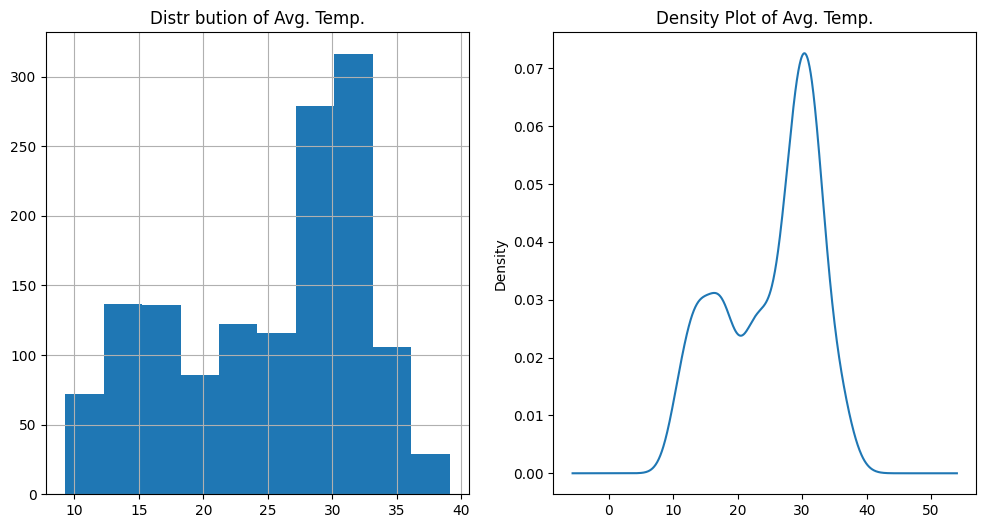

In [15]:
# Distribution and density of Avg. Temp.
fig, axes = plt.subplots(1, 2, figsize=(12,6))

df['Avg. Temp.'].hist(ax=axes[0])
axes[0].set_title('Distr bution of Avg. Temp.')
df['Avg. Temp.'].plot(kind='kde', ax=axes[1])
axes[1].set_title('Density Plot of Avg. Temp.')

plt.show()

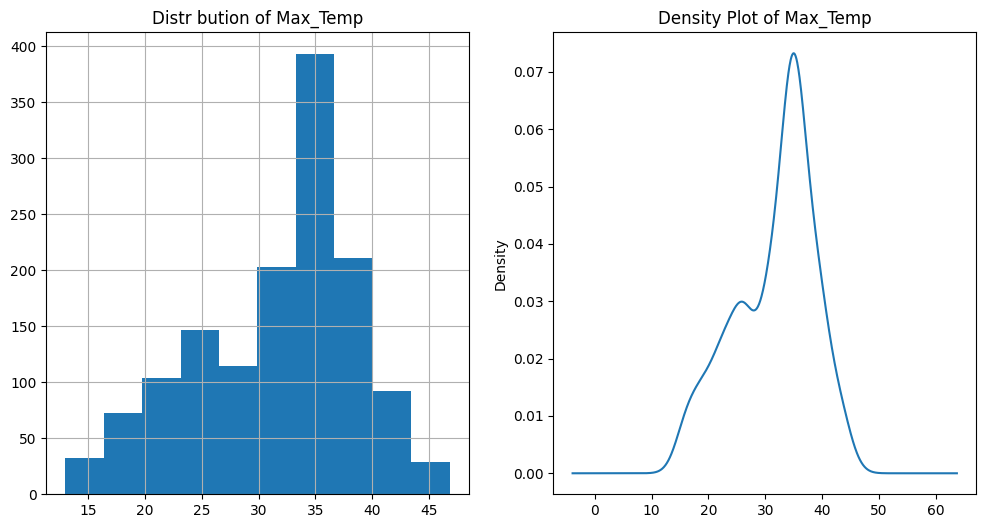

In [16]:
# Distribution and density of Max_Temp
fig, axes = plt.subplots(1, 2, figsize=(12,6))

df['Max_Temp'].hist(ax=axes[0])
axes[0].set_title('Distr bution of Max_Temp')
df['Max_Temp'].plot(kind='kde', ax=axes[1])
axes[1].set_title('Density Plot of Max_Temp')

plt.show()

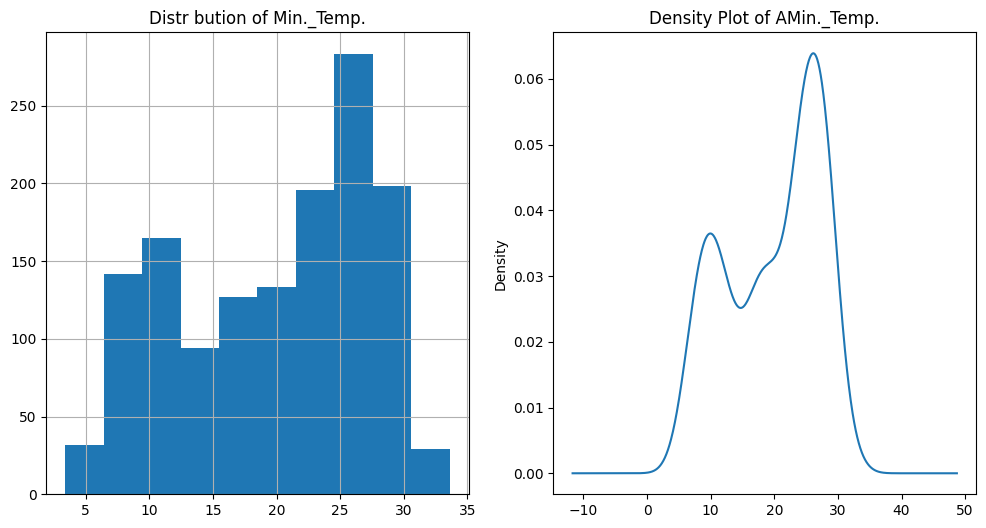

In [17]:
# Distribution and density of Min._Temp.
fig, axes = plt.subplots(1, 2, figsize=(12,6))

df['Min._Temp.'].hist(ax=axes[0])
axes[0].set_title('Distr bution of Min._Temp.')
df['Min._Temp.'].plot(kind='kde', ax=axes[1])
axes[1].set_title('Density Plot of AMin._Temp.')

plt.show()

<Figure size 2000x1500 with 0 Axes>

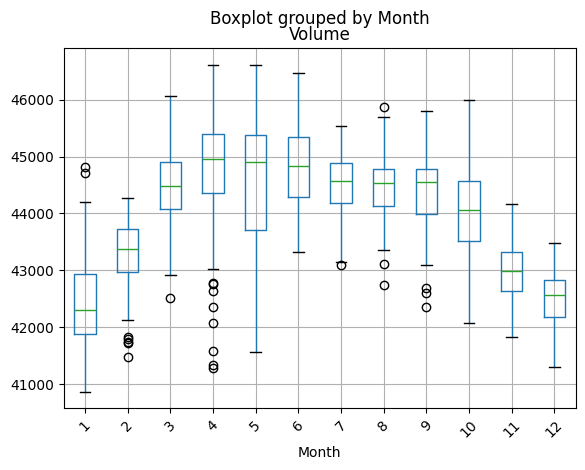

In [18]:
#Yearly Sales Volume Distribution

plt.figure(figsize=(20,15))
df.boxplot(column='Volume', by='Month')
plt.xticks(rotation=45)
plt.show()

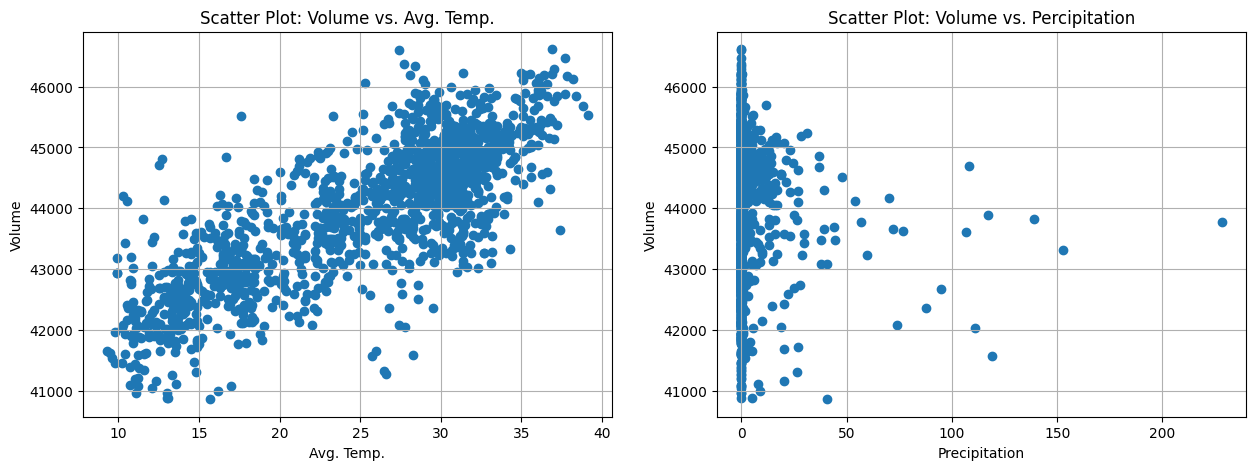

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].scatter(df['Avg. Temp.'], df['Volume']) # Access the first Axes object using axes[0]
axes[0].set_title('Scatter Plot: Volume vs. Avg. Temp.')
axes[0].set_xlabel('Avg. Temp.')
axes[0].set_ylabel('Volume')
axes[0].grid(True)

axes[1].scatter(df['Percipitation'], df['Volume']) # Access the second Axes object using axes[1]
axes[1].set_title('Scatter Plot: Volume vs. Percipitation')
axes[1].set_xlabel('Precipitation')
axes[1].set_ylabel('Volume')
axes[1].grid(True)


plt.show()

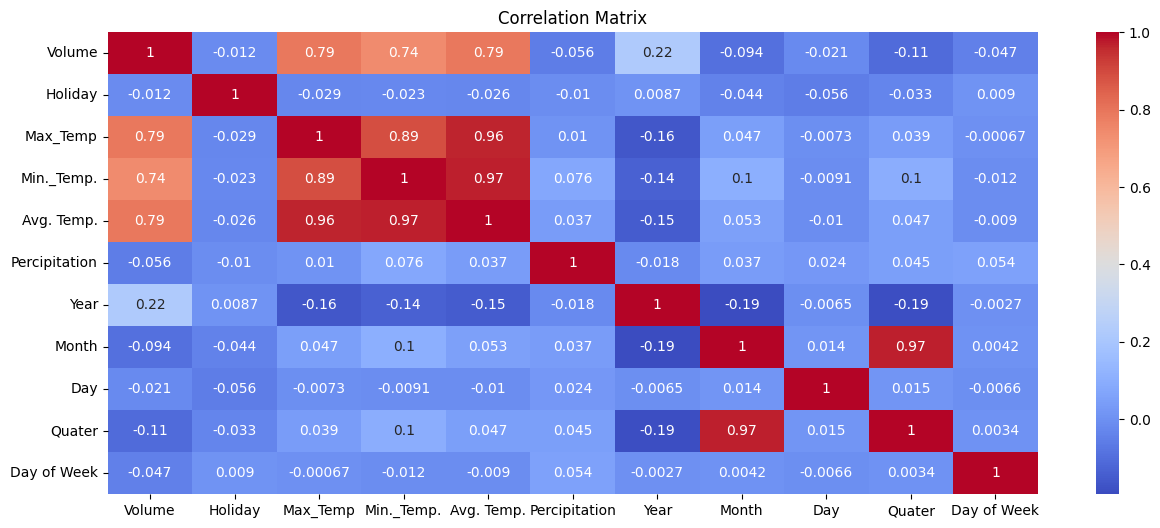

In [20]:
# Correlation Matrix of Sales Data

plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Total Volume on Holidays: 3642631.72395
Total Volume on Non-Holidays: 57833933.366390005


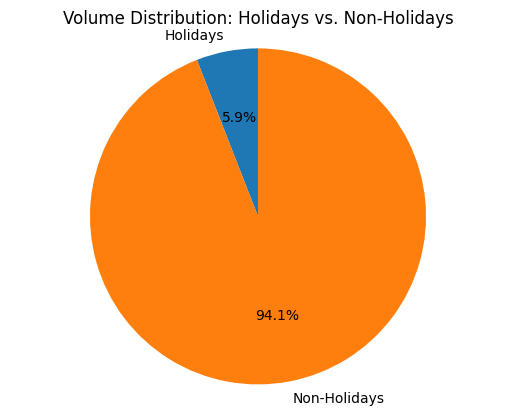

In [21]:
# Volume Distribution: Holidays vs. Non-Holidays
holiday_volume = df[df['Holiday'] == 1]['Volume'].sum()
non_holiday_volume = df[df['Holiday'] == 0]['Volume'].sum()

labels = ['Holidays', 'Non-Holidays']
sizes = [holiday_volume, non_holiday_volume]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Volume Distribution: Holidays vs. Non-Holidays')
plt.axis('equal')
print("Total Volume on Holidays:", holiday_volume)
print("Total Volume on Non-Holidays:", non_holiday_volume)

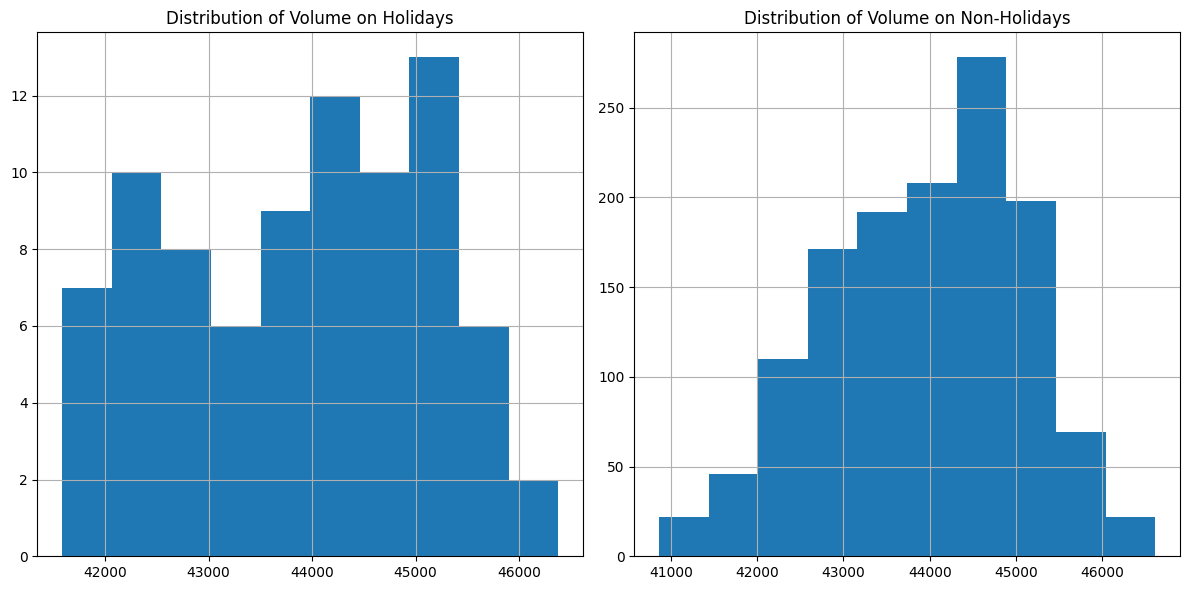

In [22]:
# Sales Volume Distribution: Holidays vs. Non-Holidays

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df[df['Holiday'] == 1]['Volume'].hist()
plt.title('Distribution of Volume on Holidays')
plt.subplot(1, 2, 2)
df[df['Holiday'] == 0]['Volume'].hist()
plt.title('Distribution of Volume on Non-Holidays')
plt.tight_layout()
plt.show()

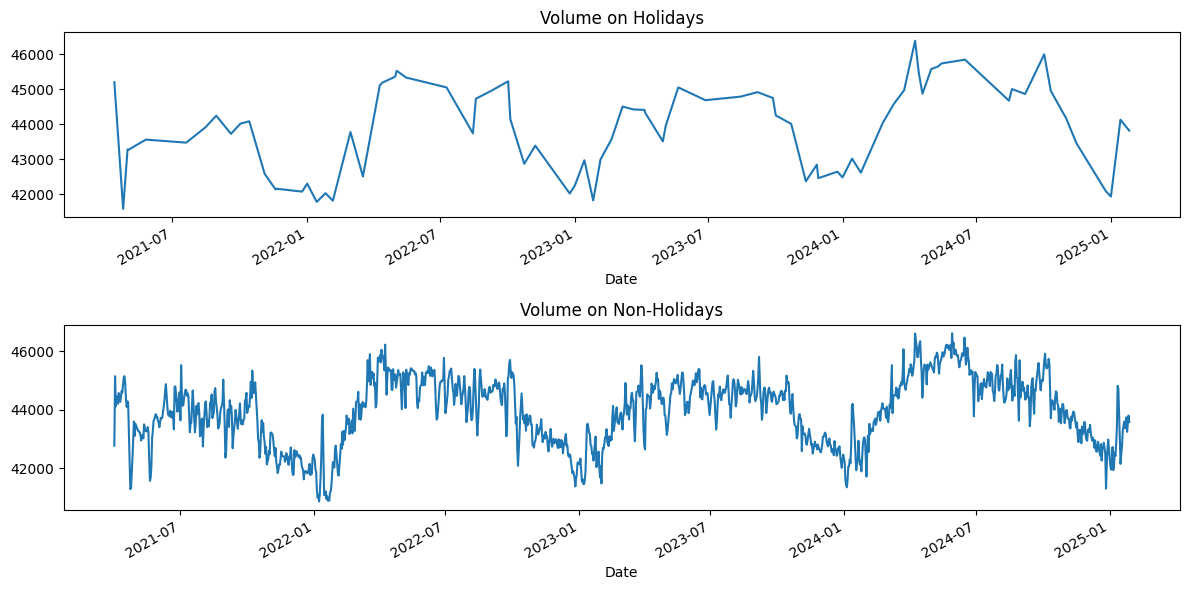

In [23]:
# Sales Volume on Holidays vs. Non-Holidays

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
df[df['Holiday'] == 1]['Volume'].plot()
plt.title('Volume on Holidays')
plt.subplot(2, 1, 2)

df[df['Holiday'] == 0]['Volume'].plot()
plt.title('Volume on Non-Holidays')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


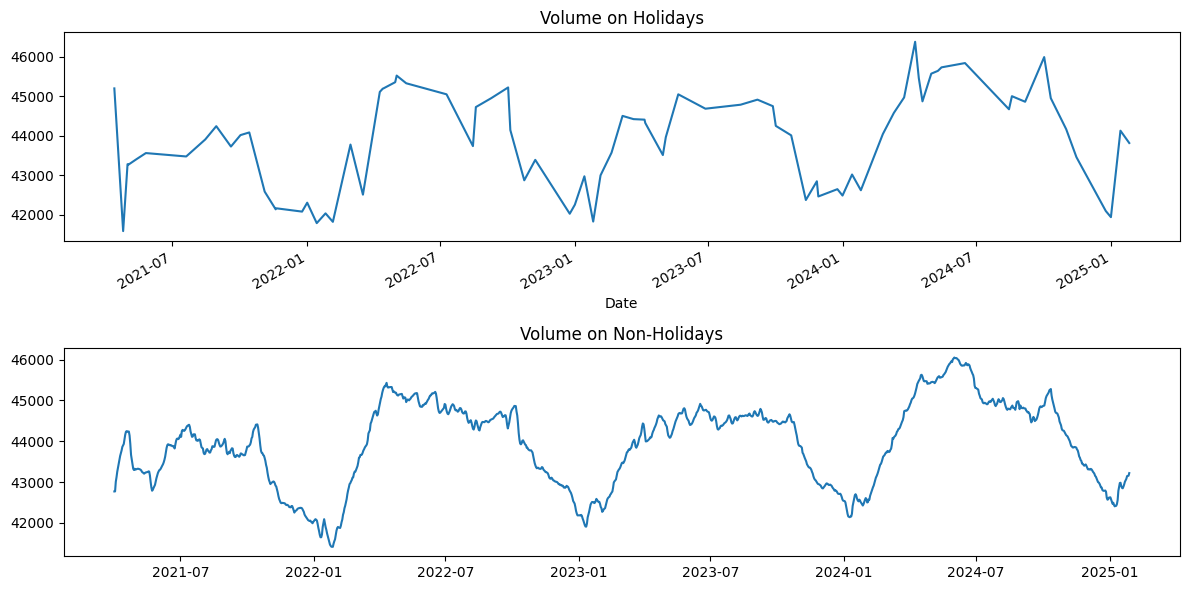

In [24]:
# Sales Volume on Holidays vs. Non-Holidays
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
df[df['Holiday'] == 1]['Volume'].plot()
plt.title('Volume on Holidays')
plt.subplot(2, 1, 2)

model = SimpleExpSmoothing(df[df['Holiday'] == 0]['Volume']).fit(smoothing_level=0.1, optimized=False)
smoothed_values = model.fittedvalues
plt.plot(smoothed_values, label='Smoothed Volume')
plt.title('Volume on Non-Holidays')
plt.tight_layout()
plt.show()

# ADF test


The augmented Dickey-Fuller (ADF) test is a statistical test that determines if a time series has a unit root. It's used to determine if a series is stationary or not.

In [25]:
df_0 = df[['Volume' , 'Avg. Temp.' , 'Percipitation','Holiday']]
df_0

Volume  Avg. Temp.  Percipitation  Holiday
Date                                                       
2021-04-01  42768.49422        27.5            0.0        0
2021-04-02  45148.27310        26.0            0.0        0
2021-04-03  44117.60887        24.8            0.0        0
2021-04-04  44464.68776        26.3            0.0        0
2021-04-05  44223.97529        29.0            0.0        0
...                 ...         ...            ...      ...
2025-01-24  43736.15871        15.6            0.0        0
2025-01-25  43241.53802        14.5            0.0        0
2025-01-26  43816.52153        14.5            0.0        1
2025-01-27  43798.64519        14.1            0.0        0
2025-01-28  43578.76768        14.0            0.0        0

[1399 rows x 4 columns]

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
## Adf Test Function

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [28]:
adf_test(df_0['Volume'],title='Volume')
print()
adf_test(df_0['Avg. Temp.'],title='Avg. Temp.')
print()
adf_test(df_0['Percipitation'],title='Percipitation')
print()
adf_test(df_0['Holiday'],title='Holiday')

Augmented Dickey-Fuller Test: Volume
ADF test statistic        -2.472679
p-value                    0.122264
# lags used               22.000000
# observations          1376.000000
critical value (1%)       -3.435111
critical value (5%)       -2.863643
critical value (10%)      -2.567890
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary

Augmented Dickey-Fuller Test: Avg. Temp.
ADF test statistic        -1.776455
p-value                    0.392212
# lags used                7.000000
# observations          1391.000000
critical value (1%)       -3.435060
critical value (5%)       -2.863620
critical value (10%)      -2.567877
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary

Augmented Dickey-Fuller Test: Percipitation
ADF test statistic       -22.789764
p-value                    0.000000
# lags used                1.000000
# observations          

In [29]:
df_transformed = df_0[['Volume' , 'Avg. Temp.' , 'Percipitation']].diff().dropna()

df_transformed['Holiday'] = df_0['Holiday'].values[1:len(df_transformed)+1]
df_transformed=df_transformed.dropna()
df_transformed

Volume  Avg. Temp.  Percipitation  Holiday
Date                                                      
2021-04-02  2379.77888        -1.5            0.0        0
2021-04-03 -1030.66423        -1.2            0.0        0
2021-04-04   347.07889         1.5            0.0        0
2021-04-05  -240.71247         2.7            0.0        0
2021-04-06   -23.08641         0.8            0.0        0
...                ...         ...            ...      ...
2025-01-24   321.66567        -1.6           -7.9        0
2025-01-25  -494.62069        -1.1            0.0        0
2025-01-26   574.98351         0.0            0.0        1
2025-01-27   -17.87634        -0.4            0.0        0
2025-01-28  -219.87751        -0.1            0.0        0

[1398 rows x 4 columns]

In [30]:
df_transformed

Volume  Avg. Temp.  Percipitation  Holiday
Date                                                      
2021-04-02  2379.77888        -1.5            0.0        0
2021-04-03 -1030.66423        -1.2            0.0        0
2021-04-04   347.07889         1.5            0.0        0
2021-04-05  -240.71247         2.7            0.0        0
2021-04-06   -23.08641         0.8            0.0        0
...                ...         ...            ...      ...
2025-01-24   321.66567        -1.6           -7.9        0
2025-01-25  -494.62069        -1.1            0.0        0
2025-01-26   574.98351         0.0            0.0        1
2025-01-27   -17.87634        -0.4            0.0        0
2025-01-28  -219.87751        -0.1            0.0        0

[1398 rows x 4 columns]

In [31]:
adf_test(df_transformed['Volume'],title='Volume')
print()
adf_test(df_transformed['Avg. Temp.'],title='Avg. Temp.')
print()
adf_test(df_transformed['Percipitation'],title='Percipitation')
print()
adf_test(df_transformed['Holiday'],title='Holiday')

Augmented Dickey-Fuller Test: Volume
ADF test statistic     -1.007932e+01
p-value                 1.200226e-17
# lags used             2.100000e+01
# observations          1.376000e+03
critical value (1%)    -3.435111e+00
critical value (5%)    -2.863643e+00
critical value (10%)   -2.567890e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: Avg. Temp.
ADF test statistic     -1.829251e+01
p-value                 2.295713e-30
# lags used             6.000000e+00
# observations          1.391000e+03
critical value (1%)    -3.435060e+00
critical value (5%)    -2.863620e+00
critical value (10%)   -2.567877e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: Percipitation
ADF test statistic     -1.458740e+01
p-value                 4.369405e-27
# lags used             2.000000e+01
# observations          1

# Train Test Split

In [32]:
train=df.iloc[:-36]
test=df.iloc[-36:]
len(train), len(test)

(1363, 36)

In [33]:
train_diff=df_transformed.iloc[:-36]
test_diff=df_transformed.iloc[-36:]
len(train), len(test)

(1363, 36)

# Model Building

# SARIMAX

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
#auto_arima(df_transformed['Volume'], seasonal=True, m=365).summary()

In [ ]:
model = SARIMAX(train_diff['Volume'],exog=train_diff[['Holiday', 'Avg. Temp.', 'Percipitation']], order=(5,0,1), enforce_invertibility=False)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Volume   No. Observations:                 1362
Model:               SARIMAX(5, 0, 1)   Log Likelihood               -9992.516
Date:                Tue, 18 Feb 2025   AIC                          20005.032
Time:                        05:51:14   BIC                          20057.199
Sample:                    04-02-2021   HQIC                         20024.560
                         - 12-23-2024                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Holiday        -119.5344     27.610     -4.329      0.000    -173.648     -65.421
Avg. Temp.       85.7041      7.908     10.838      0.000      70.205     101.203
Percipitation    -3.2361      0.623     -5.193      0.000      -4.457      -2.015
ar.L1             0.5844      0.034     17.163      0.000       0.518       0.651
ar.L2            -0.0190      0.030     -0.635      0.525      -0.078       0.040
ar.L3            -0.0570      0.035     -1.645      0.100      -0.125       0.011
ar.L4            -0.0655      0.038     -1.738      0.082      -0.139       0.008
ar.L5             0.0359      0.034      1.045      0.296      -0.031       0.103
ma.L1            -0.8646      0.033    -26.230      0.000      -0.929      -0.800
sigma2         1.392e+05   2990.752     46.548      0.000    1.33e+05    1.45e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2129.07
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train_diff)
end=len(train_diff)+len(test_diff)-1
pred=result.predict(start=start,end=end,exog=test_diff[['Holiday', 'Avg. Temp.', 'Percipitation']],typ='levels').rename('SARIMAX Predictions')
pred.index = test.index

In [ ]:
last_original_value = df['Volume'].iloc[-31]

pred_reversed = pred.copy()
pred_reversed[0] = last_original_value + pred_reversed[0]
pred_reversed = pred_reversed.cumsum()
pred_reversed.index = test.index

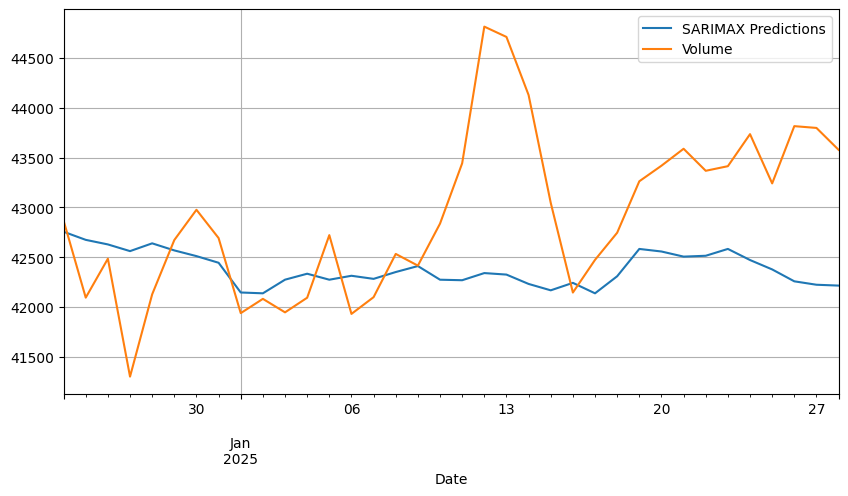

In [ ]:
pred_reversed.plot(legend=True,figsize=(10,5))
plt.grid(True)
test['Volume'].plot(legend=True)
plt.grid(True)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [ ]:
rmse_sarimax = np.sqrt(mean_squared_error(test['Volume'], pred_reversed))
nrmse_sarimax = rmse_sarimax / np.mean(test['Volume']) * 100
mae_sarimax = mean_absolute_error(test['Volume'], pred_reversed)
r2_sarimax = r2_score(test['Volume'], pred_reversed)

print(f"Root Mean Square Error for SARIMAX Model : {rmse_sarimax}")
print(f"Normalized Root Mean Square Error for SARIMAX Model : {nrmse_sarimax} % ")
print(f"Mean Absolute Error for SARIMAX Model: {mae_sarimax}")
print(f"R-squared for SARIMAX Model: {r2_sarimax}")

Root Mean Square Error for SARIMAX Model : 975.2394088004061
Normalized Root Mean Square Error for SARIMAX Model : 2.273050939095816 % 
Mean Absolute Error for SARIMAX Model: 739.8386075765338
R-squared for SARIMAX Model: -0.4853920738889923


# VAR

In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
model = VAR(train_diff)
for i in [1,2,3,4,5,6,7,8,9,10]:
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  14.833050127764318
BIC:  14.909699282836346

Order = 2
AIC:  14.708620031158834
BIC:  14.846670501184041

Order = 3
AIC:  14.603198149783298
BIC:  14.802722969162149

Order = 4
AIC:  14.537059974488765
BIC:  14.798132319814293

Order = 5
AIC:  14.493901695861027
BIC:  14.816594886300326

Order = 6
AIC:  14.489498161709182
BIC:  14.873885659386199

Order = 7
AIC:  14.481608743945666
BIC:  14.927764154325297

Order = 8
AIC:  14.478106447593277
BIC:  14.986103519866786

Order = 9
AIC:  14.474819543390211
BIC:  15.04473217086196

Order = 10
AIC:  14.463928766172264
BIC:  15.095830986647766



In [ ]:
lag_order = results.k_ar
print(lag_order)

10


In [ ]:
z = results.forecast(y=train_diff.values[-lag_order:], steps=30)

In [ ]:
results= model.fit(10)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 18, Feb, 2025
Time:                     05:51:15
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    15.0958
Nobs:                     1352.00    HQIC:                   14.7006
Log likelihood:          -17287.2    FPE:                1.91266e+06
AIC:                      14.4639    Det(Omega_mle):     1.69722e+06
--------------------------------------------------------------------
Results for equation Volume
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    16.678139        13.456530            1.239           0.215
L1.Volume                -0.282480         0.028424           -9.938           0.000
L1.Avg. Temp.            81.122306         

In [ ]:
idx = pd.date_range('2024-12-30	', periods=30, freq='D')
df_forecast = pd.DataFrame(z, index=idx, columns=['Volume_1d','Avg. Temp._1d','Percipitation_1d', 'Holiday_1d'])
df_forecast.tail()

Volume_1d  Avg. Temp._1d  Percipitation_1d  Holiday_1d
2025-01-24   0.452576      -0.011416         -0.022077    0.058425
2025-01-25  -1.050115      -0.010102          0.011653    0.058384
2025-01-26  -0.859151      -0.011781         -0.000207    0.058881
2025-01-27  -2.092055      -0.011977          0.007309    0.058719
2025-01-28  -1.706763      -0.011057          0.015754    0.059067

In [ ]:
nobs = 30

for col in ['Volume', 'Avg. Temp.', 'Percipitation']:
    # Reverse the first difference for the current column
    df_forecast[f'{col}'] = (df[col].iloc[-nobs-1] - df[col].iloc[-nobs-2]) + df_forecast[f'{col}_1d'].cumsum()

    df_forecast[f'{col}Forecast'] = df[col].iloc[-nobs-1] + df_forecast[f'{col}_1d'].cumsum()

In [ ]:
df_forecast = df_forecast[['Volume_1d', 'VolumeForecast',
                           'Avg. Temp._1d', 'Avg. Temp.Forecast',
                           'Percipitation_1d', 'PercipitationForecast']]
df_forecast.head()

Volume_1d  VolumeForecast  Avg. Temp._1d  Avg. Temp.Forecast  \
2024-12-30 -25.249144    42647.620336      -0.041801           13.958199   
2024-12-31  20.013235    42667.633571      -0.186851           13.771348   
2025-01-01 -11.696062    42655.937509       0.035944           13.807292   
2025-01-02  -5.006741    42650.930768      -0.060373           13.746919   
2025-01-03 -17.131790    42633.798979       0.019186           13.766104   

            Percipitation_1d  PercipitationForecast  
2024-12-30         -1.571253              -1.571253  
2024-12-31         -0.715368              -2.286621  
2025-01-01          1.183206              -1.103415  
2025-01-02         -0.791050              -1.894465  
2025-01-03         -1.092671              -2.987136

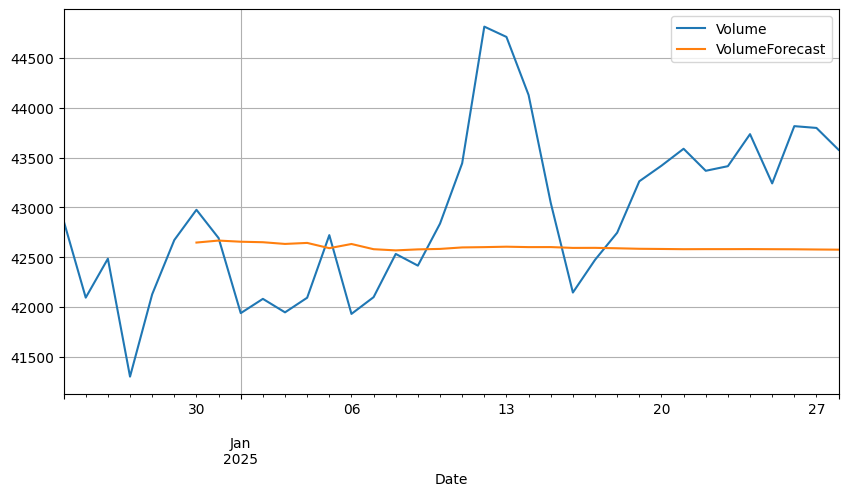

In [ ]:
test['Volume'].plot(figsize=(10,5),legend=True).autoscale(axis='x',tight=True)
plt.grid(True)
df_forecast['VolumeForecast'].plot(legend=True)
plt.grid(True)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
rmse_var = np.sqrt(mean_squared_error(df['Volume'][-nobs:], df_forecast['VolumeForecast'][-nobs:]))
nrmse_var = rmse_var / np.mean(test['Volume']) * 100
mae_var = mean_absolute_error(df['Volume'][-nobs:], df_forecast['VolumeForecast'][-nobs:])
r2_var = r2_score(df['Volume'][-nobs:], df_forecast['VolumeForecast'][-nobs:])

print(f"Root Mean Square Error for VAR Model : {rmse_var}")
print(f"Normalized Root Mean Square Error for VAR Model : {nrmse_var} %  ")
print(f"Mean Absolute Error for VAR Model: {mae_var}")
print(f"R-squared for VAR Model:  {r2_var}")

Root Mean Square Error for VAR Model : 906.6346056717475
Normalized Root Mean Square Error for VAR Model : 2.1131494720602517 %  
Mean Absolute Error for VAR Model: 730.7601740503657
R-squared for VAR Model:  -0.3336603868719332


# VARMA

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults

In [ ]:
#auto_arima(test['Volume'],maxiter=1000)

In [ ]:
#auto_arima(test['Avg. Temp.'],maxiter=1000)

In [ ]:
model = VARMAX(train_diff, order=(1,1), trend='ct')
results = model.fit(maxiter=1000, disp=False)

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            Statespace Model Results                                            
================================================================================================================
Dep. Variable:     ['Volume', 'Avg. Temp.', 'Percipitation', 'Holiday']   No. Observations:                 1362
Model:                                                       VARMA(1,1)   Log Likelihood              -17810.852
                                                            + intercept   AIC                          35721.704
Date:                                                  Tue, 18 Feb 2025   BIC                          35982.539
Time:                                                          05:52:10   HQIC                         35819.344
Sample:                                                      04-02-2021                                         
                                                           - 12-23-2024                                         
Covariance Type:                                                    opg                                         
=========================================================================================================
Ljung-Box (L1) (Q):     0.11, 0.00, 2.30, 0.00   Jarque-Bera (JB):   2031.88, 789.45, 193330.57, 11578.74
Prob(Q):                0.74, 0.96, 0.13, 0.97   Prob(JB):                         0.00, 0.00, 0.00, 0.00
Heteroskedasticity (H): 0.65, 0.59, 1.20, 0.97   Skew:                            0.27, -0.77, 3.54, 3.75
Prob(H) (two-sided):    0.00, 0.00, 0.06, 0.78   Kurtosis:                       8.96, 6.40, 60.94, 15.16
                              Results for equation Volume                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               6.6063     40.448      0.163      0.870     -72.671      85.884
intercept               0.1149      0.959      0.120      0.905      -1.764       1.994
L1.Volume              -0.1416      0.106     -1.336      0.182      -0.349       0.066
L1.Avg. Temp.          79.6140      4.589     17.348      0.000      70.619      88.609
L1.Percipitation        0.0628      1.284      0.049      0.961      -2.453       2.579
L1.Holiday            -22.0428     21.950     -1.004      0.315     -65.064      20.978
L1.e(Volume)           -0.0337      0.104     -0.322      0.747      -0.238       0.171
L1.e(Avg. Temp.)       -0.9013      4.652     -0.194      0.846     -10.019       8.216
L1.e(Percipitation)     0.1499      1.488      0.101      0.920      -2.767       3.067
L1.e(Holiday)          -3.2355     22.003     -0.147      0.883     -46.361      39.890
                                 Results for equation Avg. Temp.                                 
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
drift                            -0.0067      0.028     -0.240      0.810      -0.061       0.048
drift                            -0.0001      0.001     -0.123      0.902      -0.002       0.002
L1.Volume.Avg. Temp              -0.0001      0.002     -0.077      0.939      -0.003       0.003
L1.Avg. Temp..Avg. Temp           0.0580      1.696      0.034      0.973      -3.266       3.382
L1.Percipitation.Avg. Temp       -0.0006      0.007     -0.089      0.929      -0.014       0.013
L1.Holiday.Avg. Temp             -0.0467     19.357     -0.002      0.998     -37.986      37.892
L1.e(Volume).Avg. Temp         8.524e-05      0.002      0.055      0.956      -

In [ ]:
df_forecast = results.forecast(40)
df_forecast.tail()

Volume  Avg. Temp.  Percipitation   Holiday
2025-01-28 -5.680250   -0.033003      -0.007144  0.051828
2025-01-29 -5.688144   -0.033034      -0.007156  0.051819
2025-01-30 -5.696038   -0.033066      -0.007169  0.051811
2025-01-31 -5.703932   -0.033098      -0.007181  0.051802
2025-02-01 -5.711826   -0.033130      -0.007193  0.051794

In [ ]:
nobs = 30
# Revercing Diffrencing
df_forecast['Volume1D'] = (df['Volume'].iloc[-nobs-1]-df['Volume'].iloc[-nobs-2]) + df_forecast['Volume'].cumsum()
df_forecast['Avg. Temp.1D'] = (df['Avg. Temp.'].iloc[-nobs-1]-df['Avg. Temp.'].iloc[-nobs-2]) + df_forecast['Avg. Temp.'].cumsum()
df_forecast['Percipitation1D'] = (df['Percipitation'].iloc[-nobs-1]-df['Percipitation'].iloc[-nobs-2]) + df_forecast['Percipitation'].cumsum()

# forecast values from the first difference set
df_forecast['VolumeForecast'] = df['Volume'].iloc[-nobs-1] + df_forecast['Volume'].cumsum()
df_forecast['Avg. Temp.Forecast'] = df['Avg. Temp.'].iloc[-nobs-1] + df_forecast['Avg. Temp.'].cumsum()
df_forecast['PercipitationForecast'] = df['Percipitation'].iloc[-nobs-1] + df_forecast['Percipitation'].cumsum()

df_forecast.tail()

Volume  Avg. Temp.  Percipitation   Holiday    Volume1D  \
2025-01-28 -5.680250   -0.033003      -0.007144  0.051828  318.340902   
2025-01-29 -5.688144   -0.033034      -0.007156  0.051819  312.652758   
2025-01-30 -5.696038   -0.033066      -0.007169  0.051811  306.956719   
2025-01-31 -5.703932   -0.033098      -0.007181  0.051802  301.252787   
2025-02-01 -5.711826   -0.033130      -0.007193  0.051794  295.540961   

            Avg. Temp.1D  Percipitation1D  VolumeForecast  Avg. Temp.Forecast  \
2025-01-28     -1.968859        -1.148724    42446.068752           12.831141   
2025-01-29     -2.001893        -1.155880    42440.380608           12.798107   
2025-01-30     -2.034959        -1.163049    42434.684569           12.765041   
2025-01-31     -2.068057        -1.170230    42428.980637           12.731943   
2025-02-01     -2.101187        -1.177422    42423.268811           12.698813   

            PercipitationForecast  
2025-01-28              -0.948724  
2025-01-29              -0.955880  
2025-01-30              -0.963049  
2025-01-31              -0.970230  
2025-02-01              -0.977422

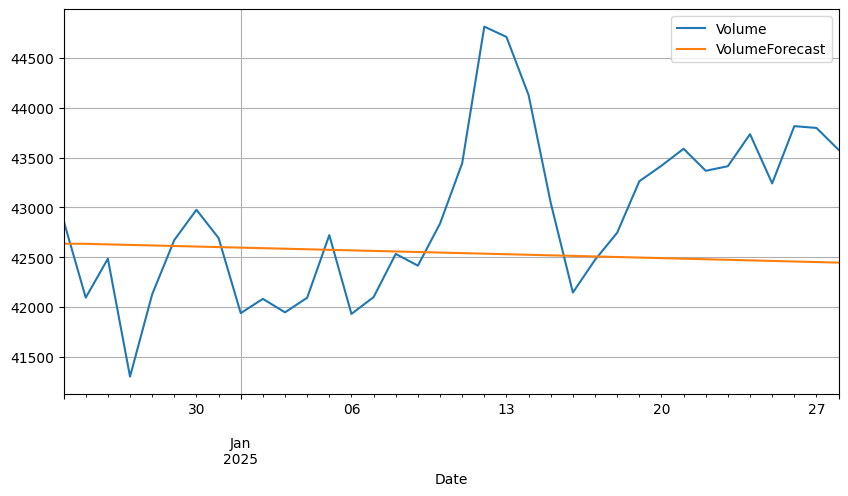

In [ ]:
start_index = test['Volume'].index[0]
forecast_len = len(test['Volume'])
forecast_data = df_forecast['VolumeForecast'].loc[start_index:].iloc[:forecast_len]

test['Volume'].plot(figsize=(10,5), legend=True).autoscale(axis='x', tight=True)
forecast_data.plot(legend=True)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
common_index = df.index.intersection(df_forecast.index[-nobs:])

actual_values = df['Volume'].loc[common_index]
forecast_data = df_forecast['VolumeForecast'].loc[common_index]
actual_values = actual_values.dropna()
forecast_data = forecast_data.dropna()

min_len = min(len(actual_values), len(forecast_data))
actual_values = actual_values[:min_len]
forecast_data = forecast_data[:min_len]

rmse_varma = np.sqrt(mean_squared_error(actual_values, forecast_data))
nrmse_varma = rmse_varma / np.mean(actual_values) * 100
mae_varma = mean_absolute_error(actual_values, forecast_data)
r2_varma = r2_score(actual_values, forecast_data)

print(f"Root Mean Square Error for VARMA Model : {rmse_varma}")
print(f"Normalized Root Mean Square Error for VARMA Model : {nrmse_varma} %  ")
print(f"Mean Absolute Error for VARMA Model: {mae_varma}")
print(f"R-squared for VARMA Model:  {r2_varma}")

Root Mean Square Error for VARMA Model : 1013.5266938051325
Normalized Root Mean Square Error for VARMA Model : 2.3500619121437647 %  
Mean Absolute Error for VARMA Model: 826.1202321696476
R-squared for VARMA Model:  -0.665424192960292


# Prophet
Here we will reintroduce the dataframe beacuse Prophet requires the date and target coloumn to be renamed to 'ds' , 'y' repectively.

# FB Prophet


In [ ]:
#!pip install prophet
from prophet import Prophet

In [ ]:
df1 = pd.read_csv('data volume.csv')

In [ ]:
df1 = df1.rename(columns={'Date': 'ds', 'Volume': 'y'})
df1.tail(20)

ds            y  Holiday  Max_Temp  Min._Temp.  Avg. Temp.  \
1393  23-Jan-25  43414.49304        0      23.0        13.0        17.2   
1394  24-Jan-25  43736.15871        0      22.0        10.0        15.6   
1395  25-Jan-25  43241.53802        0      22.0         9.0        14.5   
1396  26-Jan-25  43816.52153        1      22.0         8.0        14.5   
1397  27-Jan-25  43798.64519        0      21.0         8.0        14.1   
1398  28-Jan-25  43578.76768        0      22.5         7.4        14.0   
1399  29-Jan-25          NaN        0      24.0         8.3        15.1   
1400  30-Jan-25          NaN        0      25.0        10.6        16.5   
1401  31-Jan-25          NaN        0      25.1        11.1        17.1   
1402  01-Feb-25          NaN        0      24.1        11.8        17.3   
1403  02-Feb-25          NaN        0      22.8        12.6        16.8   
1404  03-Feb-25          NaN        0      23.3        10.9        16.2   
1405  04-Feb-25          NaN        0      24.4        12.8        18.3   
1406  05-Feb-25          NaN        0      26.0        11.0        16.4   
1407  06-Feb-25          NaN        0      22.3        11.2        16.0   
1408  07-Feb-25          NaN        0      22.3        11.0        16.0   
1409  08-Feb-25          NaN        0      24.4        10.9        16.7   
1410  09-Feb-25          NaN        0      25.1        10.0        16.8   
1411  10-Feb-25          NaN        0      26.0        10.5        17.8   
1412  11-Feb-25          NaN        0      27.5        12.1        19.0   

      Percipitation  
1393            7.9  
1394            0.0  
1395            0.0  
1396            0.0  
1397            0.0  
1398            0.0  
1399            0.0  
1400            0.0  
1401            0.0  
1402            0.0  
1403            0.0  
1404            0.0  
1405            0.0  
1406            0.0  
1407            0.0  
1408            0.0  
1409            0.0  
1410            0.0  
1411            0.0  
1412            0.0

In [ ]:
model = Prophet(seasonality_mode='multiplicative')

model.add_regressor('Holiday')
model.add_regressor('Max_Temp')
model.add_regressor('Min._Temp.')
model.add_regressor('Avg. Temp.')
model.add_regressor('Percipitation')
model.fit(df1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwkr73qtj/ji91tjga.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwkr73qtj/0sxm9spt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3274', 'data', 'file=/tmp/tmpwkr73qtj/ji91tjga.json', 'init=/tmp/tmpwkr73qtj/0sxm9spt.json', 'output', 'file=/tmp/tmpwkr73qtj/prophet_model6bthub2l/prophet_model-20250218055212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:52:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:52:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=0)
future = pd.concat([future, df1[['Holiday', 'Max_Temp',	'Min._Temp.', 'Avg. Temp.', 'Percipitation']].reset_index(drop=True)], axis=1)
future

ds  Holiday  Max_Temp  Min._Temp.  Avg. Temp.  Percipitation
0    2021-04-01        0      34.0        21.0        27.5            0.0
1    2021-04-02        0      34.2        18.8        26.0            0.0
2    2021-04-03        0      35.0        13.4        24.8            0.0
3    2021-04-04        0      37.0        15.8        26.3            0.0
4    2021-04-05        0      39.0        20.0        29.0            0.0
...         ...      ...       ...         ...         ...            ...
1408 2025-02-07        0      22.3        11.0        16.0            0.0
1409 2025-02-08        0      24.4        10.9        16.7            0.0
1410 2025-02-09        0      25.1        10.0        16.8            0.0
1411 2025-02-10        0      26.0        10.5        17.8            0.0
1412 2025-02-11        0      27.5        12.1        19.0            0.0

[1413 rows x 6 columns]

In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds          yhat    yhat_lower    yhat_upper
0    2021-04-01  43778.906179  43261.645482  44364.713590
1    2021-04-02  43708.738354  43192.760668  44244.948316
2    2021-04-03  43708.921464  43111.994948  44255.052802
3    2021-04-04  43962.214214  43387.062805  44512.466178
4    2021-04-05  44215.720684  43647.902075  44739.939771
...         ...           ...           ...           ...
1408 2025-02-07  43187.497398  42654.753326  43743.360821
1409 2025-02-08  43315.596752  42778.669045  43856.502886
1410 2025-02-09  43497.913548  42964.915087  44061.203224
1411 2025-02-10  43689.270902  43146.752691  44249.228221
1412 2025-02-11  43978.737597  43412.956483  44518.666781

[1413 rows x 4 columns]

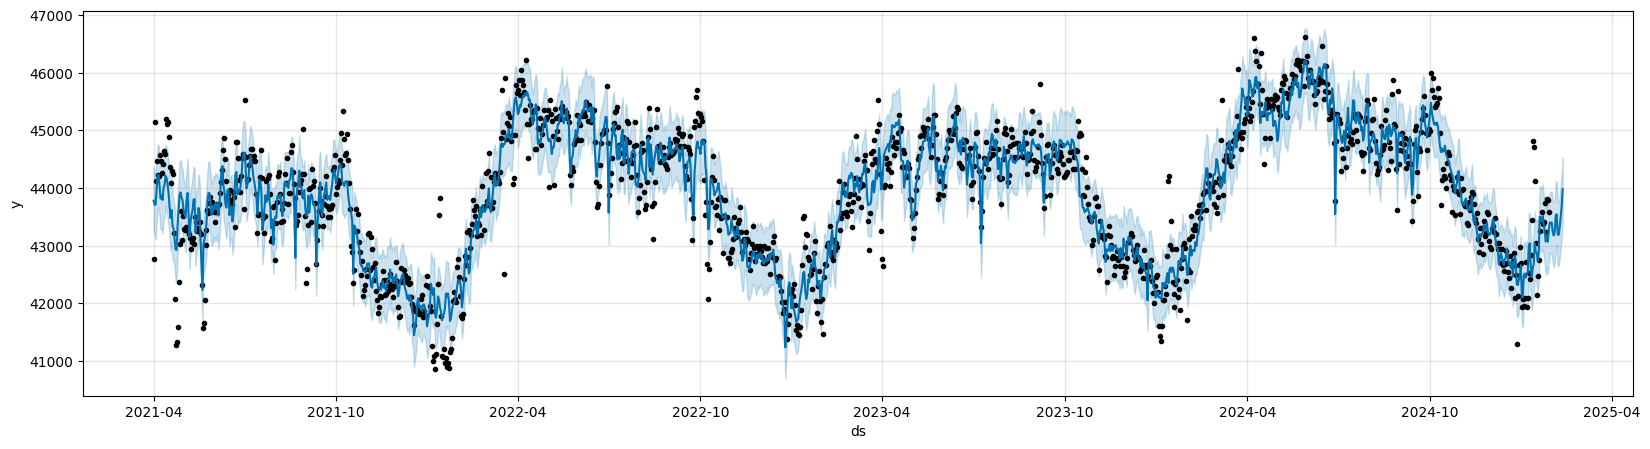

In [ ]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot()
fig = model.plot(forecast, ax=ax)

plt.show()
plt.show()

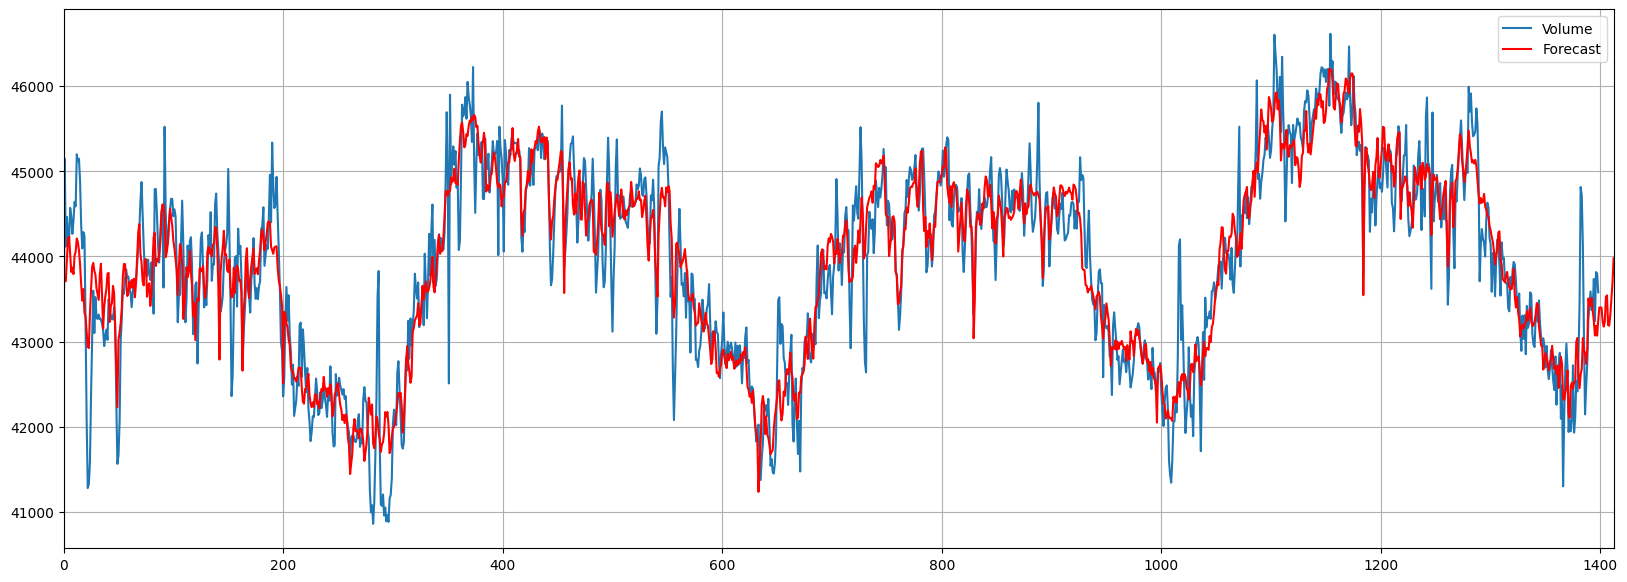

In [ ]:
df1['y'].plot(figsize=(20,7),legend=True,label='Volume').autoscale(axis='x',tight=True)
plt.plot(forecast["yhat"], color='red',label='Forecast')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def adjusted_r2(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n_samples = len(y_true)
    adjusted_r2 = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)
    return adjusted_r2

In [ ]:
prediction = forecast['yhat'][:-14]

rmse_prophet = np.sqrt(mean_squared_error(df1['y'][:-14], prediction))
nrmse_prophet = rmse_prophet / np.mean(df1['y'][:-14]) * 100
mae_prophet = mean_absolute_error(df1['y'][:-14], prediction)
r2_prophet = r2_score(df1['y'][:-14], prediction)

print(f"Root Mean Square Error for Prophet Model : {rmse_prophet}")
print(f"Normalized Root Mean Square Error for Prophet Model : {nrmse_prophet} %  ")
print(f"Mean Absolute Error for Prophet Model: {mae_prophet}")
print(f"R-squared for Prophet Model:  {r2_prophet}")

Root Mean Square Error for Prophet Model : 428.06963970707494
Normalized Root Mean Square Error for Prophet Model : 0.9741426266580727 %  
Mean Absolute Error for Prophet Model: 313.1773730483542
R-squared for Prophet Model:  0.8590087946708773


# FB Prophet 2


In [ ]:
#!pip install prophet
from prophet import Prophet

In [ ]:
df2 = pd.read_csv('data volume.csv')

In [ ]:
df2 = df2.rename(columns={'Date': 'ds', 'Volume': 'y'})
df2.tail(20)

ds            y  Holiday  Max_Temp  Min._Temp.  Avg. Temp.  \
1393  23-Jan-25  43414.49304        0      23.0        13.0        17.2   
1394  24-Jan-25  43736.15871        0      22.0        10.0        15.6   
1395  25-Jan-25  43241.53802        0      22.0         9.0        14.5   
1396  26-Jan-25  43816.52153        1      22.0         8.0        14.5   
1397  27-Jan-25  43798.64519        0      21.0         8.0        14.1   
1398  28-Jan-25  43578.76768        0      22.5         7.4        14.0   
1399  29-Jan-25          NaN        0      24.0         8.3        15.1   
1400  30-Jan-25          NaN        0      25.0        10.6        16.5   
1401  31-Jan-25          NaN        0      25.1        11.1        17.1   
1402  01-Feb-25          NaN        0      24.1        11.8        17.3   
1403  02-Feb-25          NaN        0      22.8        12.6        16.8   
1404  03-Feb-25          NaN        0      23.3        10.9        16.2   
1405  04-Feb-25          NaN        0      24.4        12.8        18.3   
1406  05-Feb-25          NaN        0      26.0        11.0        16.4   
1407  06-Feb-25          NaN        0      22.3        11.2        16.0   
1408  07-Feb-25          NaN        0      22.3        11.0        16.0   
1409  08-Feb-25          NaN        0      24.4        10.9        16.7   
1410  09-Feb-25          NaN        0      25.1        10.0        16.8   
1411  10-Feb-25          NaN        0      26.0        10.5        17.8   
1412  11-Feb-25          NaN        0      27.5        12.1        19.0   

      Percipitation  
1393            7.9  
1394            0.0  
1395            0.0  
1396            0.0  
1397            0.0  
1398            0.0  
1399            0.0  
1400            0.0  
1401            0.0  
1402            0.0  
1403            0.0  
1404            0.0  
1405            0.0  
1406            0.0  
1407            0.0  
1408            0.0  
1409            0.0  
1410            0.0  
1411            0.0  
1412            0.0

In [ ]:
model_2 = Prophet(seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    holidays_prior_scale=15,
    changepoint_prior_scale=0.1,
    mcmc_samples=50)

model_2.add_regressor('Holiday')
model_2.add_regressor('Max_Temp')
model_2.add_regressor('Min._Temp.')
model_2.add_regressor('Avg. Temp.')
model_2.add_regressor('Percipitation')
model_2.fit(df2)

DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwkr73qtj/987vy04f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwkr73qtj/uqke8khi.json
05:52:14 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=26197', 'data', 'file=/tmp/tmpwkr73qtj/987vy04f.json', 'init=/tmp/tmpwkr73qtj/uqke8khi.json', 'output', 'file=/tmp/tmpwkr73qtj/prophet_modelo68qkf32/prophet_model-20250218055214_1.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=26197', 'data', 'file=/tmp/tmpwkr73qtj/987vy04f.json', 'init=/tmp/tmpwkr73qtj/uqke8khi.json', 'output', 'file=/tmp/tmpwkr73qtj/prophet_modelo68qkf32/prophet_model-20250218055214_2.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

05:52:18 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=26197', 'data', 'file=/tmp/tmpwkr73qtj/987vy04f.json', 'init=/tmp/tmpwkr73qtj/uqke8khi.json', 'output', 'file=/tmp/tmpwkr73qtj/prophet_modelo68qkf32/prophet_model-20250218055214_1.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpwkr73qtj/prophet_modelo68qkf32/prophet_model-20250218055214_1.csv
 console_msgs (if any):
	/tmp/tmpwkr73qtj/prophet_modelo68qkf32/prophet_model-20250218055214_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 25
    num_warmup = 25
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [ ]:
future_2 = model_2.make_future_dataframe(periods=0)
future_2 = pd.concat([future_2, df2[['Holiday','Max_Temp','Min._Temp.', 'Avg. Temp.', 'Percipitation']].reset_index(drop=True)], axis=1)
future_2

ds  Holiday  Max_Temp  Min._Temp.  Avg. Temp.  Percipitation
0    2021-04-01        0      34.0        21.0        27.5            0.0
1    2021-04-02        0      34.2        18.8        26.0            0.0
2    2021-04-03        0      35.0        13.4        24.8            0.0
3    2021-04-04        0      37.0        15.8        26.3            0.0
4    2021-04-05        0      39.0        20.0        29.0            0.0
...         ...      ...       ...         ...         ...            ...
1408 2025-02-07        0      22.3        11.0        16.0            0.0
1409 2025-02-08        0      24.4        10.9        16.7            0.0
1410 2025-02-09        0      25.1        10.0        16.8            0.0
1411 2025-02-10        0      26.0        10.5        17.8            0.0
1412 2025-02-11        0      27.5        12.1        19.0            0.0

[1413 rows x 6 columns]

In [ ]:
forecast_2 = model_2.predict(future_2)
forecast_2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds          yhat    yhat_lower    yhat_upper
0    2021-04-01  44174.620466  42830.209887  45421.271052
1    2021-04-02  44068.973093  42655.678832  45316.718120
2    2021-04-03  44055.701346  42542.452574  45327.236567
3    2021-04-04  44292.568498  42736.861344  45464.785042
4    2021-04-05  44539.900227  43069.049462  45759.313032
...         ...           ...           ...           ...
1408 2025-02-07  43479.525714  42071.025770  44721.906920
1409 2025-02-08  43586.790549  42146.458623  44799.982520
1410 2025-02-09  43783.558516  42307.882045  45027.684026
1411 2025-02-10  43992.671856  42471.480178  45295.489197
1412 2025-02-11  44231.217391  42762.555727  45599.307416

[1413 rows x 4 columns]

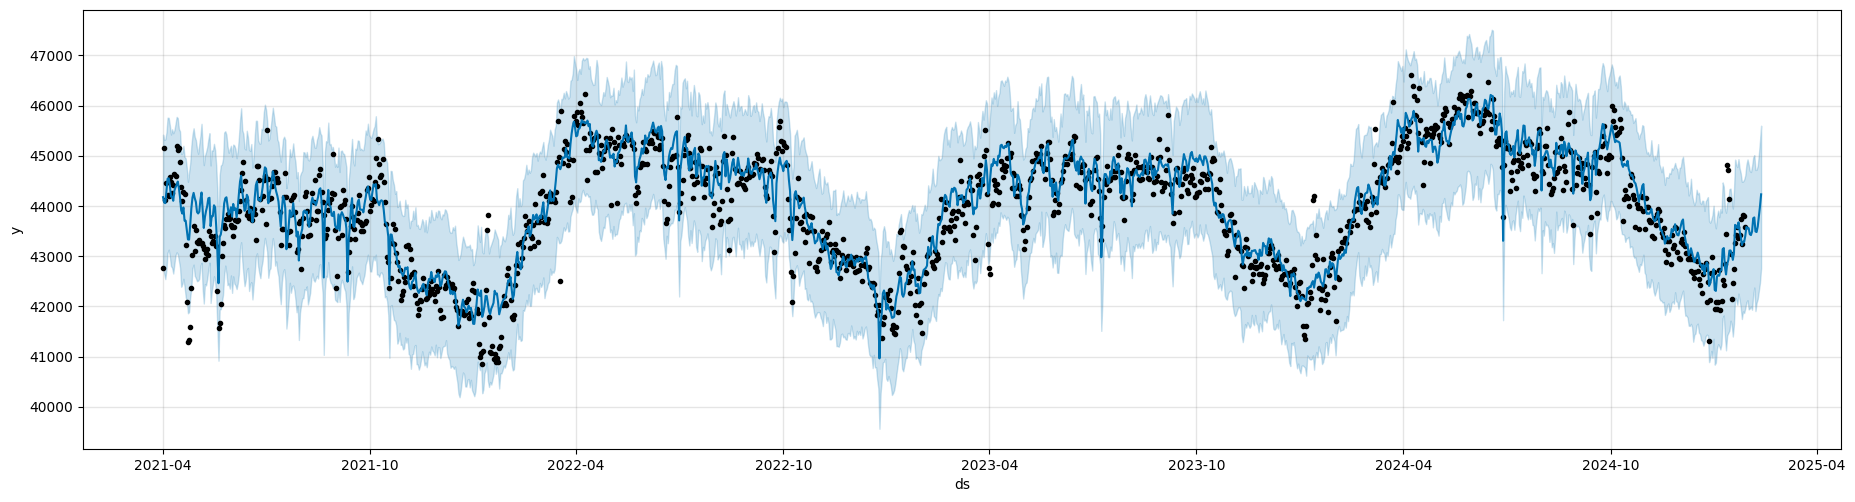

In [ ]:
fig = model_2.plot(forecast_2)
fig.set_size_inches(20,5)
print()

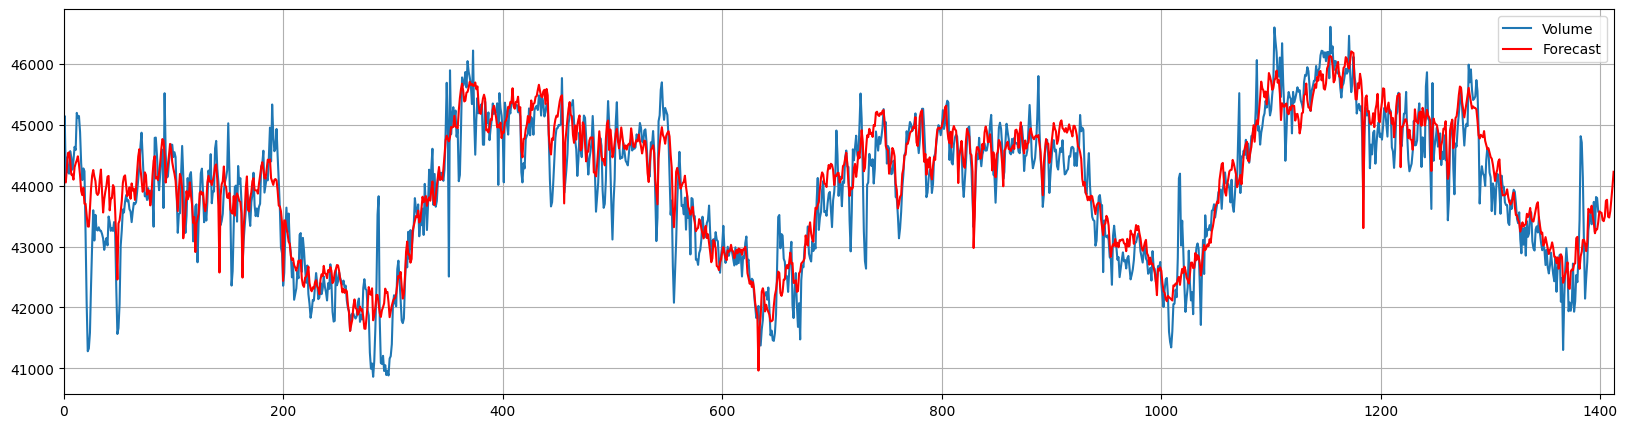

In [ ]:
df2['y'].plot(figsize=(20,5), legend=True, label='Volume').autoscale(axis='x', tight=True)
plt.plot(forecast_2["yhat"], color='red', label='Forecast')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
prediction_2 = forecast_2['yhat'][:-14]

rmse_prophet2 = np.sqrt(mean_squared_error(df2['y'][:-14], prediction_2))
nrmse_prophet2 = rmse_prophet2 / np.mean(df2['y'][:-14]) * 100
mae_prophet2 = mean_absolute_error(df2['y'][:-14], prediction_2)
r2_prophet2 = r2_score(df2['y'][:-14], prediction_2)

print(f'RMSE for model 2: {rmse_prophet2}')
print(f'NRMSE for model 2: {nrmse_prophet2} %')
print(f'MAE for model 2: {mae_prophet2}')
print(f'R-squared for model 2: {r2_prophet2}')

RMSE for model 2: 458.83253970359107
NRMSE for model 2: 1.0441486477034623 %
MAE for model 2: 342.09077473070823
R-squared for model 2: 0.8380161978532568


# FB Prophet 3


In [ ]:
#!pip install prophet
from prophet import Prophet

In [ ]:
df3 = pd.read_csv('data volume.csv', index_col='Date',parse_dates=True)

df3['Year'] = df3.index.year
df3['Month'] = df3.index.month
df3['Day'] = df3.index.day
df3['Quater'] = df3.index.quarter
df3['Day of Week'] = df3.index.dayofweek
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1413 entries, 2021-04-01 to 2025-02-11
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Volume         1399 non-null   float64
 1   Holiday        1413 non-null   int64  
 2   Max_Temp       1413 non-null   float64
 3   Min._Temp.     1413 non-null   float64
 4   Avg. Temp.     1413 non-null   float64
 5   Percipitation  1413 non-null   float64
 6   Year           1413 non-null   int32  
 7   Month          1413 non-null   int32  
 8   Day            1413 non-null   int32  
 9   Quater         1413 non-null   int32  
 10  Day of Week    1413 non-null   int32  
dtypes: float64(5), int32(5), int64(1)
memory usage: 104.9 KB


In [ ]:
df3 = df3.reset_index()
df3 = df3.rename(columns={'Date': 'ds', 'Volume': 'y'})
#df3 = df3.drop(['index','level_0'], axis=1)
df3

ds            y  Holiday  Max_Temp  Min._Temp.  Avg. Temp.  \
0    2021-04-01  42768.49422        0      34.0        21.0        27.5   
1    2021-04-02  45148.27310        0      34.2        18.8        26.0   
2    2021-04-03  44117.60887        0      35.0        13.4        24.8   
3    2021-04-04  44464.68776        0      37.0        15.8        26.3   
4    2021-04-05  44223.97529        0      39.0        20.0        29.0   
...         ...          ...      ...       ...         ...         ...   
1408 2025-02-07          NaN        0      22.3        11.0        16.0   
1409 2025-02-08          NaN        0      24.4        10.9        16.7   
1410 2025-02-09          NaN        0      25.1        10.0        16.8   
1411 2025-02-10          NaN        0      26.0        10.5        17.8   
1412 2025-02-11          NaN        0      27.5        12.1        19.0   

      Percipitation  Year  Month  Day  Quater  Day of Week  
0               0.0  2021      4    1       2            3  
1               0.0  2021      4    2       2            4  
2               0.0  2021      4    3       2            5  
3               0.0  2021      4    4       2            6  
4               0.0  2021      4    5       2            0  
...             ...   ...    ...  ...     ...          ...  
1408            0.0  2025      2    7       1            4  
1409            0.0  2025      2    8       1            5  
1410            0.0  2025      2    9       1            6  
1411            0.0  2025      2   10       1            0  
1412            0.0  2025      2   11       1            1  

[1413 rows x 12 columns]

In [ ]:
model_3 = Prophet(seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    )

model_3.add_regressor('Holiday')
model_3.add_regressor('Avg. Temp.')



model_3.fit(df3)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwkr73qtj/nixjn64m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwkr73qtj/cuv8a70l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2123', 'data', 'file=/tmp/tmpwkr73qtj/nixjn64m.json', 'init=/tmp/tmpwkr73qtj/cuv8a70l.json', 'output', 'file=/tmp/tmpwkr73qtj/prophet_model4l_pnejx/prophet_model-20250218055223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:52:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:52:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_3 = model_3.make_future_dataframe(periods=0)
future_3 = pd.concat([future_3, df3[['Holiday', 'Avg. Temp.',]].reset_index(drop=True)], axis=1)
future_3

ds  Holiday  Avg. Temp.
0    2021-04-01        0        27.5
1    2021-04-02        0        26.0
2    2021-04-03        0        24.8
3    2021-04-04        0        26.3
4    2021-04-05        0        29.0
...         ...      ...         ...
1408 2025-02-07        0        16.0
1409 2025-02-08        0        16.7
1410 2025-02-09        0        16.8
1411 2025-02-10        0        17.8
1412 2025-02-11        0        19.0

[1413 rows x 3 columns]

In [ ]:
forecast_3 = model_3.predict(future_3)
forecast_3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds          yhat    yhat_lower    yhat_upper
0    2021-04-01  44399.196152  43828.324049  44942.718555
1    2021-04-02  44182.110864  43591.114498  44769.858120
2    2021-04-03  43942.756964  43412.088250  44522.273911
3    2021-04-04  44167.551704  43625.469390  44749.762190
4    2021-04-05  44486.189518  43959.295404  45076.635419
...         ...           ...           ...           ...
1408 2025-02-07  43424.394824  42868.951014  43974.878137
1409 2025-02-08  43460.821041  42912.489438  44051.086647
1410 2025-02-09  43588.895544  43025.391566  44137.501454
1411 2025-02-10  43788.015103  43263.529598  44347.758177
1412 2025-02-11  44071.880857  43530.290758  44643.600218

[1413 rows x 4 columns]

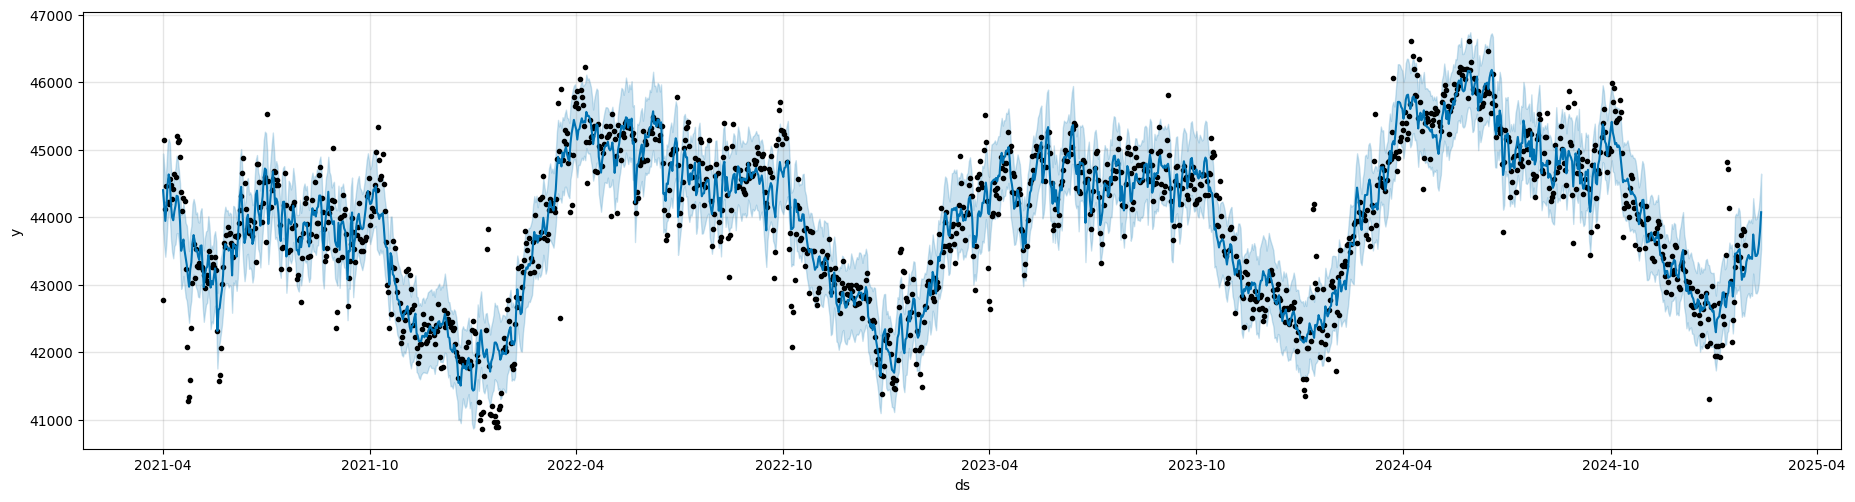

In [ ]:
fig = model_3.plot(forecast_3)
fig.set_size_inches(20,5)
print()

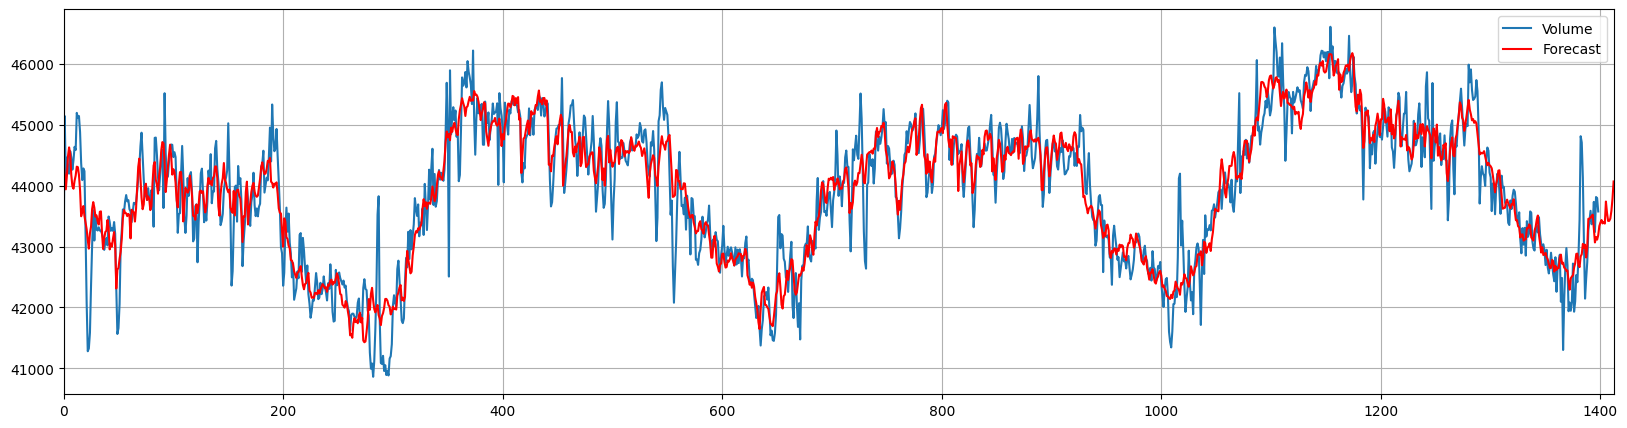

In [ ]:
df3['y'].plot(figsize=(20,5), legend=True, label='Volume').autoscale(axis='x', tight=True)
plt.plot(forecast_3["yhat"], color='red', label='Forecast')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
prediction_3 = forecast_3['yhat'][:-14]

rmse_prophet3= np.sqrt(mean_squared_error(df3['y'][:-14], prediction_3))
nrmse_prophet3 = rmse_prophet3 / np.mean(df3['y'][:-14]) * 100
mae_prophet3 = mean_absolute_error(df3['y'][:-14], prediction_3)
r2_prophet3 = r2_score(df3['y'][:-14], prediction_3)

print(f'RMSE for model 3: {rmse_prophet3}')
print(f'NRMSE for model 3: {nrmse_prophet3} %')
print(f'MAE for model 3: {mae_prophet3}')
print(f'R-squared for model 3: {r2_prophet3}')

RMSE for model 3: 432.8793285718297
NRMSE for model 3: 0.9850878619878345 %
MAE for model 3: 313.01060293312884
R-squared for model 3: 0.8558227081735259


# Deep Learning Models

In [ ]:
#!pip install keras
#!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df4= pd.read_csv('data volume.csv')
df4 = df4[:-14]

In [ ]:
df4['Date'] = pd.to_datetime(df4['Date'], format='%d-%b-%y',)
df4 = df4.sort_values(by='Date')

In [ ]:
features = ['Holiday', 'Max_Temp', 'Min._Temp.', 'Avg. Temp.', 'Percipitation']
target = 'Volume'

LSTMs often use activation functions like sigmoid or tanh, which have limited output ranges. Scaling the data to match these ranges helps prevent saturation and allows the model to learn more effectively.

In [ ]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
df4[features] = scaler_X.fit_transform(df4[features])
df4[target] = scaler_y.fit_transform(df4[[target]])

Creating input sequences and corresponding target values for the LSTM model using a sliding window approach.


In [ ]:
sequence_length = 10
X, y = [], []
for i in range(len(df4) - sequence_length):
    X.append(df4[features].iloc[i:i+sequence_length].values)
    y.append(df4[target].iloc[i + sequence_length])

X, y = np.array(X), np.array(y)

In [ ]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
len(X_train), len(X_test), len(y_train), len(y_test)

(1111, 278, 1111, 278)

 # Long Short-Term Memoy (LSTM) based Recurrent Neural Networks (RNN)

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout

RNNs are designed to handle sequential data by maintaining a "hidden state" that captures information from previous time steps. They process input sequences one step at a time, updating the hidden state at each step.

In [ ]:
model1 = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(sequence_length, len(features))),
    Dropout(0.2),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 10, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,881 (120.63 KB)

 Trainable params: 30,881 (120.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(optimizer='adam', loss='mse')

In [ ]:
history1 = model1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 0.1473 - val_loss: 0.0294
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0261 - val_loss: 0.0173
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0227 - val_loss: 0.0184
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0223 - val_loss: 0.0177
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0209 - val_loss: 0.0184
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0209 - val_loss: 0.0241
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0205 - val_loss: 0.0188
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0195 - val_loss: 0.0259
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0185 - val_loss: 0.0220
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0186 - val_loss: 0.0152
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0191 - val_loss: 0.0215
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0

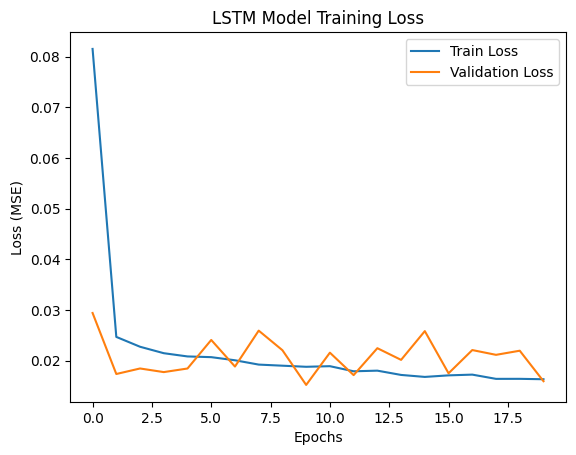

In [ ]:
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title("LSTM Model Training Loss")
plt.show()

In [ ]:
y_pred1 = model1.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


In [ ]:
y_pred_rescaled1 = scaler_y.inverse_transform(y_pred1)
y_test_rescaled1 = scaler_y.inverse_transform(y_test.reshape(-1, 1))

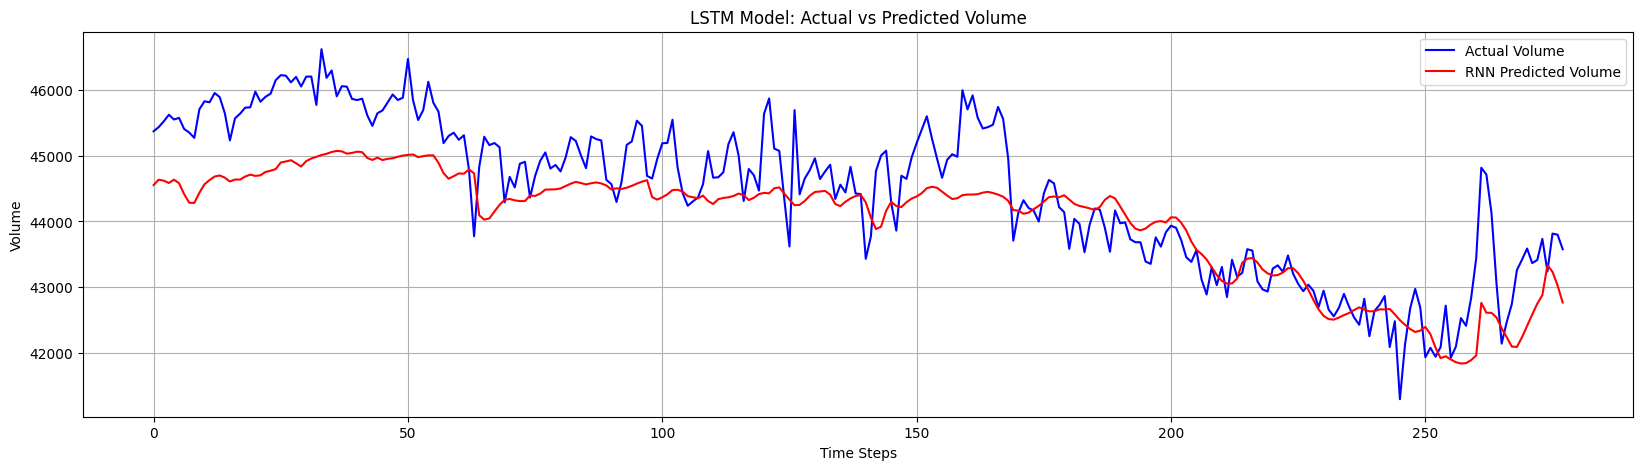

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(y_test_rescaled1, label="Actual Volume", color="blue")
plt.plot(y_pred_rescaled1, label="RNN Predicted Volume", color="red")
plt.xlabel("Time Steps")
plt.ylabel("Volume")
plt.title("LSTM Model: Actual vs Predicted Volume")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
rmse_lstm = np.sqrt(mean_squared_error(y_pred_rescaled1, y_test_rescaled1))
nrmse_lstm =  rmse_lstm / np.mean(y_test_rescaled1) * 100
mae_lstm = mean_absolute_error(y_pred_rescaled1, y_test_rescaled1)
r2_lstm = r2_score(y_pred_rescaled1, y_test_rescaled1)


print(f"Root Mean Square Error for RNN Model : {rmse_lstm}")
print(f"Normalized Root Mean Square Error for RNN Model : {nrmse_lstm} %  ")
print(f"Mean Absolute Error for RNN Model: {mae_lstm}")
print(f"R-squared for RNN Model:  {r2_lstm}")


Root Mean Square Error for RNN Model : 725.9311360105614
Normalized Root Mean Square Error for RNN Model : 1.6329967884612024 %  
Mean Absolute Error for RNN Model: 583.7244227832732
R-squared for RNN Model:  0.2693822613026139


# Convolutional Neural Network (CNN)


In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

 CNNs use convolutional filters to extract local patterns from data. For time series, 1D convolutions are applied across the time dimension to capture temporal features.

In [ ]:
model2 = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, len(features))),MaxPooling1D(pool_size=2),Flatten(),
    Dense(32, activation='relu'),
    Dense(1,  activation='linear')
])
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 8, 64)               │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,281 (36.25 KB)

 Trainable params: 9,281 (36.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer='adam', loss='mse')

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0974 - val_loss: 0.0155
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229 - val_loss: 0.0164
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190 - val_loss: 0.0166
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0194 - val_loss: 0.0192
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183 - val_loss: 0.0147
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0170 - val_loss: 0.0151
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0154 - val_loss: 0.0235
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0154 - val_loss: 0.0136
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0162 - val_loss: 0.0238
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0156 - val_loss: 0.0142
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0144 - val_loss: 0.0105
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0156 - val

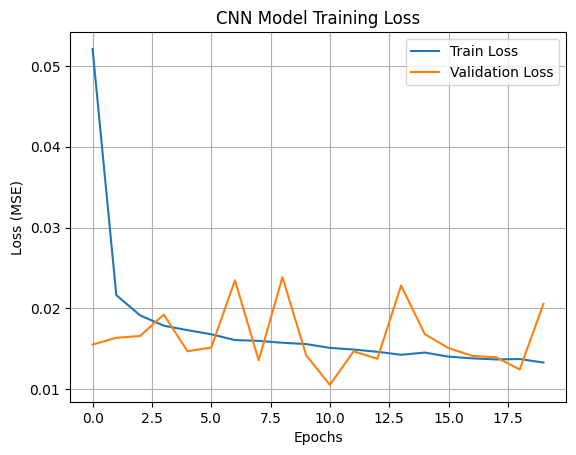

In [ ]:
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_pred2 = model2.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [ ]:
y_pred_rescaled2 = scaler_y.inverse_transform(y_pred2)
y_test_rescaled2 = scaler_y.inverse_transform(y_test.reshape(-1, 1))

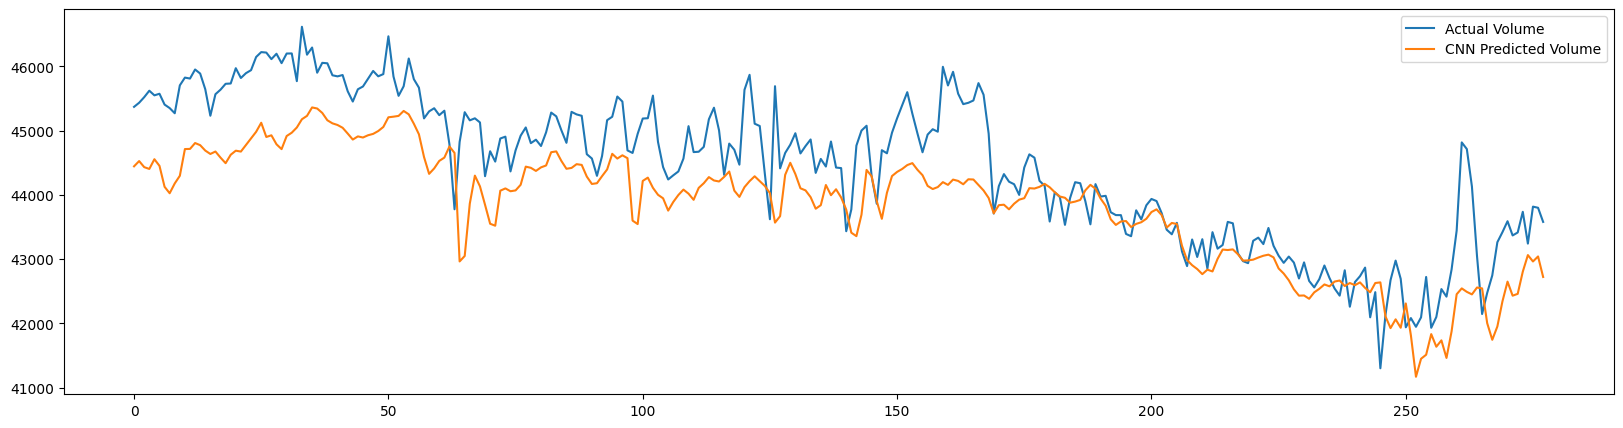

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(y_test_rescaled2, label="Actual Volume")
plt.plot(y_pred_rescaled2, label="CNN Predicted Volume")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse_cnn = np.sqrt(mean_squared_error(y_pred_rescaled2, y_test_rescaled2))
nrmse_cnn = rmse_cnn / np.mean(y_test_rescaled2) * 100
mae_cnn = mean_absolute_error(y_pred_rescaled2, y_test_rescaled2)
r2_cnn = r2_score(y_pred_rescaled2, y_test_rescaled2)

print(f"Root Mean Square Error for CNN Model : {rmse_cnn}")
print(f"Normalized Root Mean Square Error for CNN Model : {nrmse_cnn} %  ")
print(f"Mean Absolute Error for CNN Model: {mae_cnn}")
print(f"R-squared for CNN Model:  {r2_cnn}")



Root Mean Square Error for CNN Model : 825.1378928799573
Normalized Root Mean Square Error for CNN Model : 1.8561643966887378 %  
Mean Absolute Error for CNN Model: 682.6354707104315
R-squared for CNN Model:  0.17322363646582994


# Gated Recurrent Unit (GRU)

In [ ]:
from tensorflow.keras.layers import GRU

GRUs are a variant of RNNs designed to address the vanishing gradient problem. They use gating mechanisms (update and reset gates) to control the flow of information, allowing them to capture long-term dependencies more effectively.

In [ ]:
model3 = Sequential([
    GRU(64, activation='relu', return_sequences=True, input_shape=(sequence_length, len(features))),Dropout(0.2),
    GRU(32, activation='relu', return_sequences=False),Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])
model3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 10, 64)              │          13,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,585 (92.13 KB)

 Trainable params: 23,585 (92.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model3.compile(optimizer='adam', loss='mse')

In [ ]:
history3 = model3.fit(X_train, y_train, epochs=20, batch_size=30, validation_data=(X_test, y_test))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.1952 - val_loss: 0.0286
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0338 - val_loss: 0.0204
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0243 - val_loss: 0.0206
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0234 - val_loss: 0.0189
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0221 - val_loss: 0.0373
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0212 - val_loss: 0.0206
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0206 - val_loss: 0.0239
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0207 - val_loss: 0.0228
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0210 - val_loss: 0.0253
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0184 - val_loss: 0.0271
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0190 - val_loss: 0.0330
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.

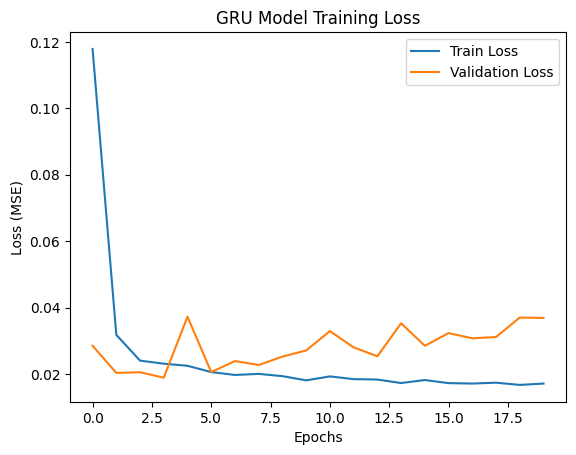

In [ ]:
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title("GRU Model Training Loss")
plt.show()

In [ ]:
y_pred3 = model3.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


In [ ]:
y_pred_rescaled3 = scaler_y.inverse_transform(y_pred3)
y_test_rescaled3 = scaler_y.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse_gru = np.sqrt(mean_squared_error(y_pred_rescaled3, y_test_rescaled3))
nrmse_gru = rmse_gru / np.mean(y_test_rescaled3) * 100
mae_gru = mean_absolute_error(y_pred_rescaled3, y_test_rescaled3)
r2_gru = r2_score(y_pred_rescaled3, y_test_rescaled3)

print(f"Root Mean Square Error for GRU Model : {rmse_gru}")
print(f"Normalized Root Mean Square Error for GRU Model : {nrmse_gru} %  ")
print(f"Mean Absolute Error for GRU Model: {mae_gru}")
print(f"R-squared for GRU Model:  {r2_gru}")


Root Mean Square Error for GRU Model : 1105.4368732706241
Normalized Root Mean Square Error for GRU Model : 2.486702628321013 %  
Mean Absolute Error for GRU Model: 937.4312425044961
R-squared for GRU Model:  -1.422543508917638


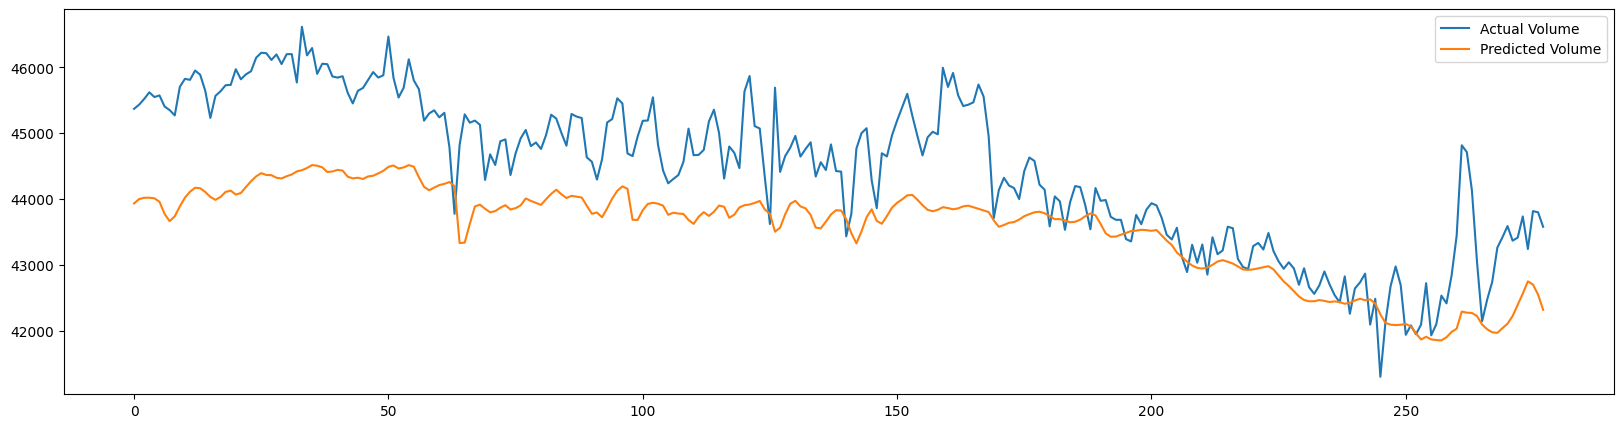

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(y_test_rescaled3, label="Actual Volume")
plt.plot(y_pred_rescaled3, label="Predicted Volume")
plt.legend()
plt.show()

# Final Observation

In [ ]:
models = pd.DataFrame({
    'Model': ['Seasonal Autoregressive Integrated Moving Average with Exogenous', 'Vector Auto Regression', 'Vector Auto Regression Moving Average', 'Prophet', 'Prophet 2','Prophet 3' , 'Recurrent Neural Network', 'Convolution Neural Network', 'Gated recurrent unit'],
    'Root Mean Square Error': [rmse_sarimax, rmse_var, rmse_varma, rmse_prophet, rmse_prophet2,rmse_prophet3, rmse_lstm, rmse_cnn, rmse_gru],
    'Normalized Root Mean Square Error': [nrmse_sarimax, nrmse_var, nrmse_varma, nrmse_prophet, nrmse_prophet2,nrmse_prophet3, nrmse_lstm, nrmse_cnn, nrmse_gru],
    'Mean Absolute Error': [mae_sarimax, mae_var, mae_varma, mae_prophet, mae_prophet2, mae_prophet3, mae_lstm, mae_cnn, mae_gru],
    'R-Squared': [r2_sarimax, r2_var, r2_varma, r2_prophet, r2_prophet2, r2_prophet3, r2_lstm, r2_cnn, r2_gru]
    })

models['Normalized Root Mean Square Error'] = models['Normalized Root Mean Square Error'].apply(lambda x: f'{x:.2f}%')

models = models.sort_values(by='Normalized Root Mean Square Error', ascending=True).style.hide(axis="index").set_properties(**{'font-size': '14pt'})
display(models)

*   Root mean squared error (RMSE) is the square root of the mean of the square of all of the error
*   Normalized Root Mean Square Error (NRMSE) measures the accuracy of a predictive model by comparing the predicted values to the observed values
*   Mean Absolute Error (MAE) is a metric that calculates the average magnitude of the absolute errors between the predicted and actual values.
*   The R-squared metric (R^{2}) is a statistical measure that shows how well a regression model fits the data







# **The Prophet  model demonstrates the best overall performance among the evaluated models, achieving the lowest RMSE ,NRMSE percentage and MAE values, while having a highest R-squared value. This suggests that Prophet provides the most accurate predictions with the least error.**

# Business Insights & Implementation
The insights derived from this forecasting model can be effectively utilized by curd manufacturers and distributors to optimize their operations, minimize wastage, and improve profitability. Below is key business recommendations based on the analysis:

#1. Demand-Based Production Planning

•	Insight: Forecasting allows manufacturers to anticipate spikes in demand, especially during certain seasons, holidays, or temperature changes.

•	Actionable Strategy:

o	Adjust production schedules to increase supply during high-demand periods (e.g., summer months, festive seasons) and scale down during low-demand periods to prevent overproduction and wastage.

o	Utilize historical data trends and predicted demand to manage raw material procurement efficiently (e.g., ensuring milk supply aligns with expected curd production).

#2. Inventory & Supply Chain Optimization

•	Insight: Poor demand forecasting can lead to excessive inventory, leading to spoilage and financial losses.

•	Actionable Strategy:

o	Implement a just-in-time inventory approach using daily or weekly demand forecasts to prevent overstocking.

o	Work closely with retailers and distributors to align stock levels with expected demand and avoid unnecessary surplus.

o	Use real-time forecasting models to update production levels dynamically based on changes in consumer demand patterns.

#3. Regional Distribution & Expansion

•	Insight: Demand varies by region based on weather, festivals, and consumption habits.
•	Actionable Strategy:

o	Identify regions with higher demand and focus distribution efforts accordingly.
       
o	Use predictive insights to expand into new markets with high curd consumption potential.

o	Optimize logistics routes to ensure faster delivery to high-demand areas, reducing spoilage risks.


# Final Thoughts
By leveraging the demand forecasting model, fast-moving consumer goods (FMCG)
sector can shift from reactive to proactive decision-making, reducing waste, optimizing supply chains, and maximizing revenue. Implementing these strategies ensures sustained growth and better market competitiveness.